## PHASE 0: Import relevant libraries and files

In [2]:
# !pip install pandas==2.1.1
# !pip install scorecardpy==0.1.9.7

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# For scorecard construction
import warnings
import scorecardpy as sc
import pprint

In [63]:
appData = pd.read_csv("../IS453 Group Assignment - Data/IS453 Group Assignment - Data/IS453 Group Assignment - Application Data.csv")
bureauData = pd.read_csv("../IS453 Group Assignment - Data/IS453 Group Assignment - Data/IS453 Group Assignment - Bureau Data.csv")

## PHASE 1: Data Exploration

### Application Data analysis
Review data characteristics and summary statistics

In [64]:
# View structures
print("Application Data Structure \n")
appData.info()

Application Data Structure 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(41), object(16)
memory usage: 281.5+ MB


In [65]:
# Reviewing columns and rows of appData

app_column_names = appData.columns
app_column_count = len(appData.columns)
app_row_count = len(appData)

print("Application Data Column Names:",app_column_names)
print("Application Data Row Count:", app_row_count)
print("Application Data Column Count:", app_column_count)

appData.head()


Application Data Column Names: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=120)
Application Data Row Count: 307511
Application Data Column Count: 120


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# check missing data amongst the columns
missing_data_count = appData.isnull().sum()

# Filter columns with missing data
columns_with_missing_data = missing_data_count[missing_data_count > 0]

# Display the result
print("Columns with missing values and their counts:")
print(columns_with_missing_data)

Columns with missing values and their counts:
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 65, dtype: int64


### Application Data Charts Analysis

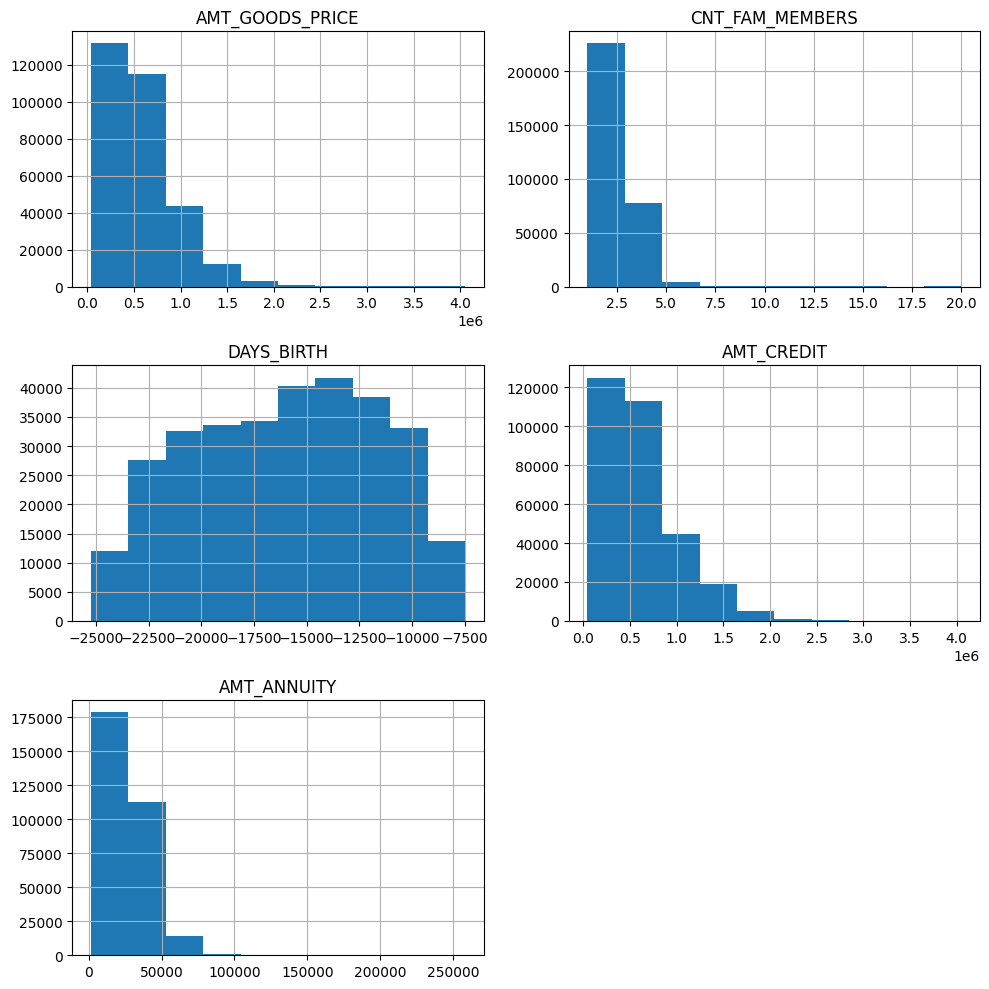

In [67]:
# examine the distirbution of the numeric variables
numeric_var = ['AMT_GOODS_PRICE','CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY']

appData[numeric_var].hist(figsize=(10,10))
plt.tight_layout()

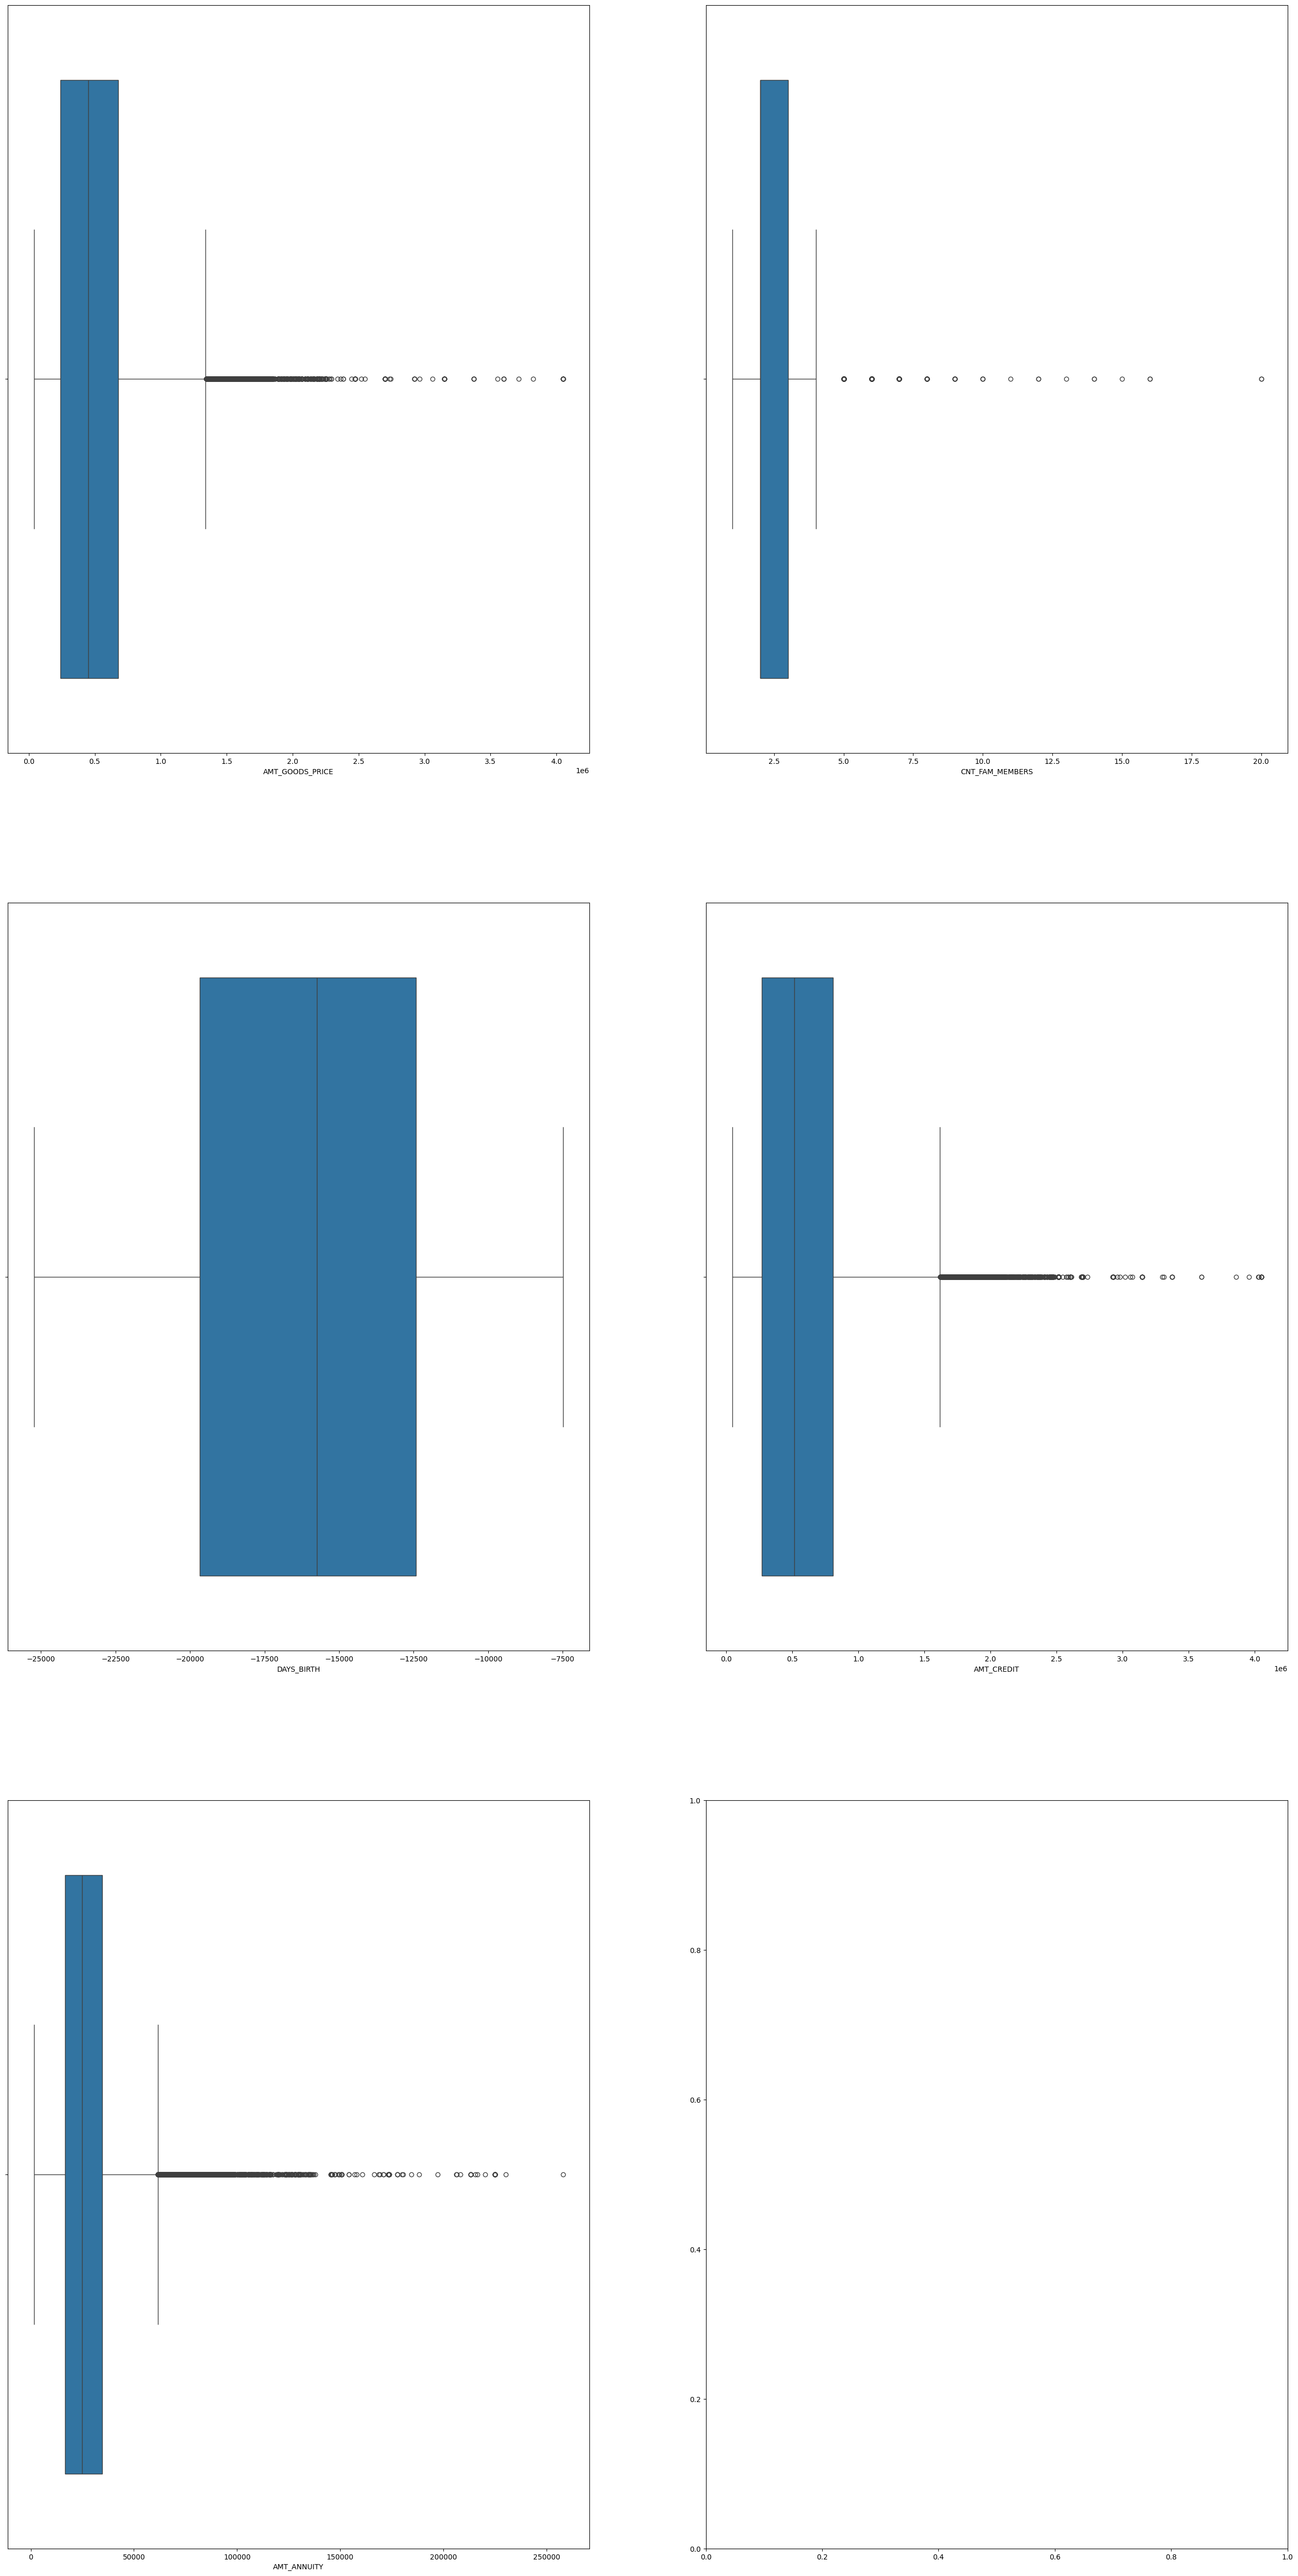

In [68]:
# boxplots to identify outliers

row_count=int(np.ceil(len(numeric_var)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=appData[numeric_var[i]],orient='h')
    axis.set_xlabel(str(numeric_var[i]))
    if i == len(numeric_var)-1: 
         break
    
# Show the plot
plt.show()

In [69]:
# We used the these charts to understand the distributions of application data but it turned out to be not useful in our analysis
# row_count=int(np.ceil(len(numeric_var)/2))
# fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 32))

# for i, axis in enumerate(fig.axes):
#     # show in decending order if categoridal
#     if appData[numeric_var[i]].dtype == 'O':
#         sns.countplot(ax=axis, x = appData[numeric_var[i]], order=appData[numeric_var[i]].value_counts(ascending=False).index)
#     else:
#       sns.countplot(ax=axis, x = appData[numeric_var[i]])
#     axis.set_xlabel(str(numeric_var[i]))
#     if i == len(numeric_var)-1: 
#          break
    
# # Show the plot
# plt.show()

We used the above charts to understand the distributions of application data but it turned out to be not useful in our analysis

### Bureau Data analysis
Review data characteristics and summary statistics

In [70]:
print("Bureau Data Structure \n")
bureauData.info()

Bureau Data Structure 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [71]:
# Reviewing columns and rows of BureauData
bureau_column_names = bureauData.columns
bureau_column_count = len(bureauData.columns)
bureau_row_count = len(bureauData)

print("Bureau Data Column Names:",bureau_column_names)
print("Bureau Data Row Count:", bureau_row_count)
print("Bureau Data Column Count:", bureau_column_count)

bureauData.head()

Bureau Data Column Names: Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')
Bureau Data Row Count: 1716428
Bureau Data Column Count: 17


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [72]:
# check missing data amongst the columns
missing_data_count = bureauData.isnull().sum()

# Filter columns with missing data
columns_with_missing_data = missing_data_count[missing_data_count > 0]

# Display the result
print("Columns with missing values and their counts:")
print(columns_with_missing_data)

Columns with missing values and their counts:
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_ANNUITY               1226791
dtype: int64


### Bureau Data Charts Analysis

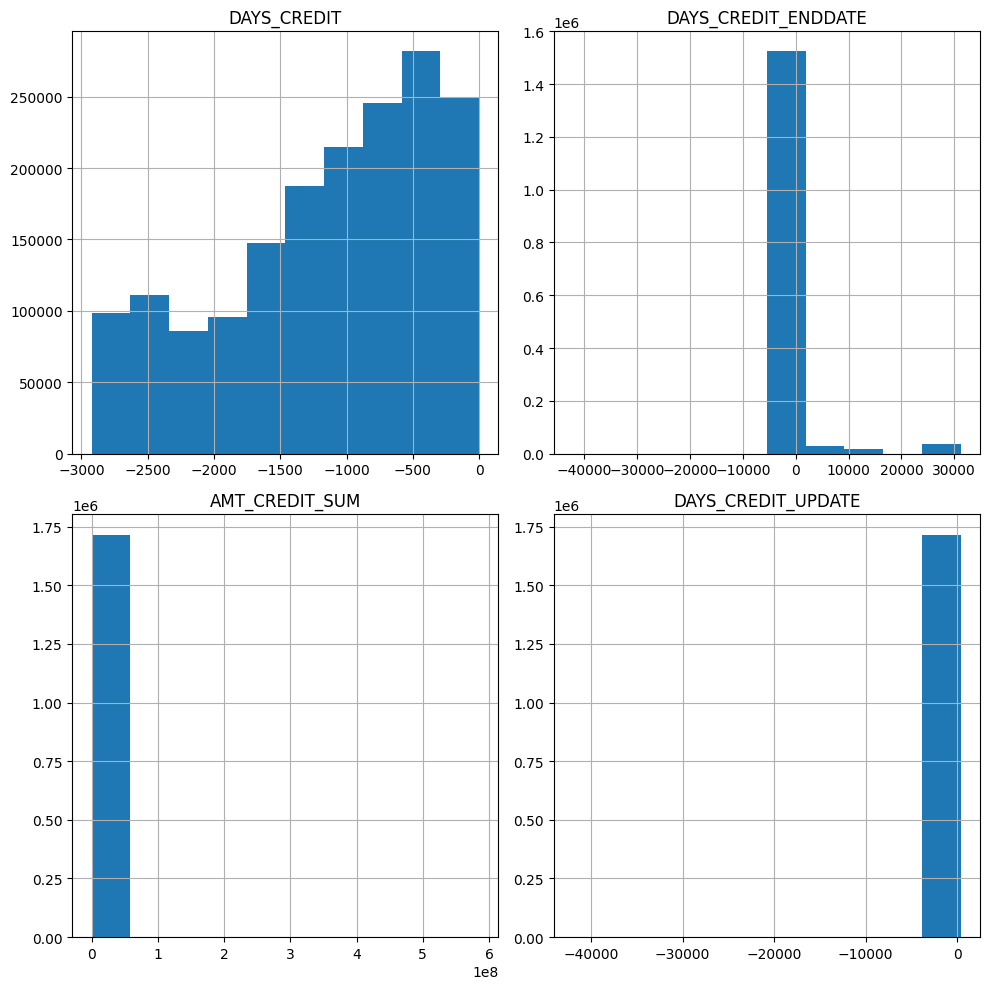

In [73]:
# examine the distirbution of the numeric variables
numeric_var_bureau = ['DAYS_CREDIT','DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE']

bureauData[numeric_var_bureau].hist(figsize=(10,10))
plt.tight_layout()

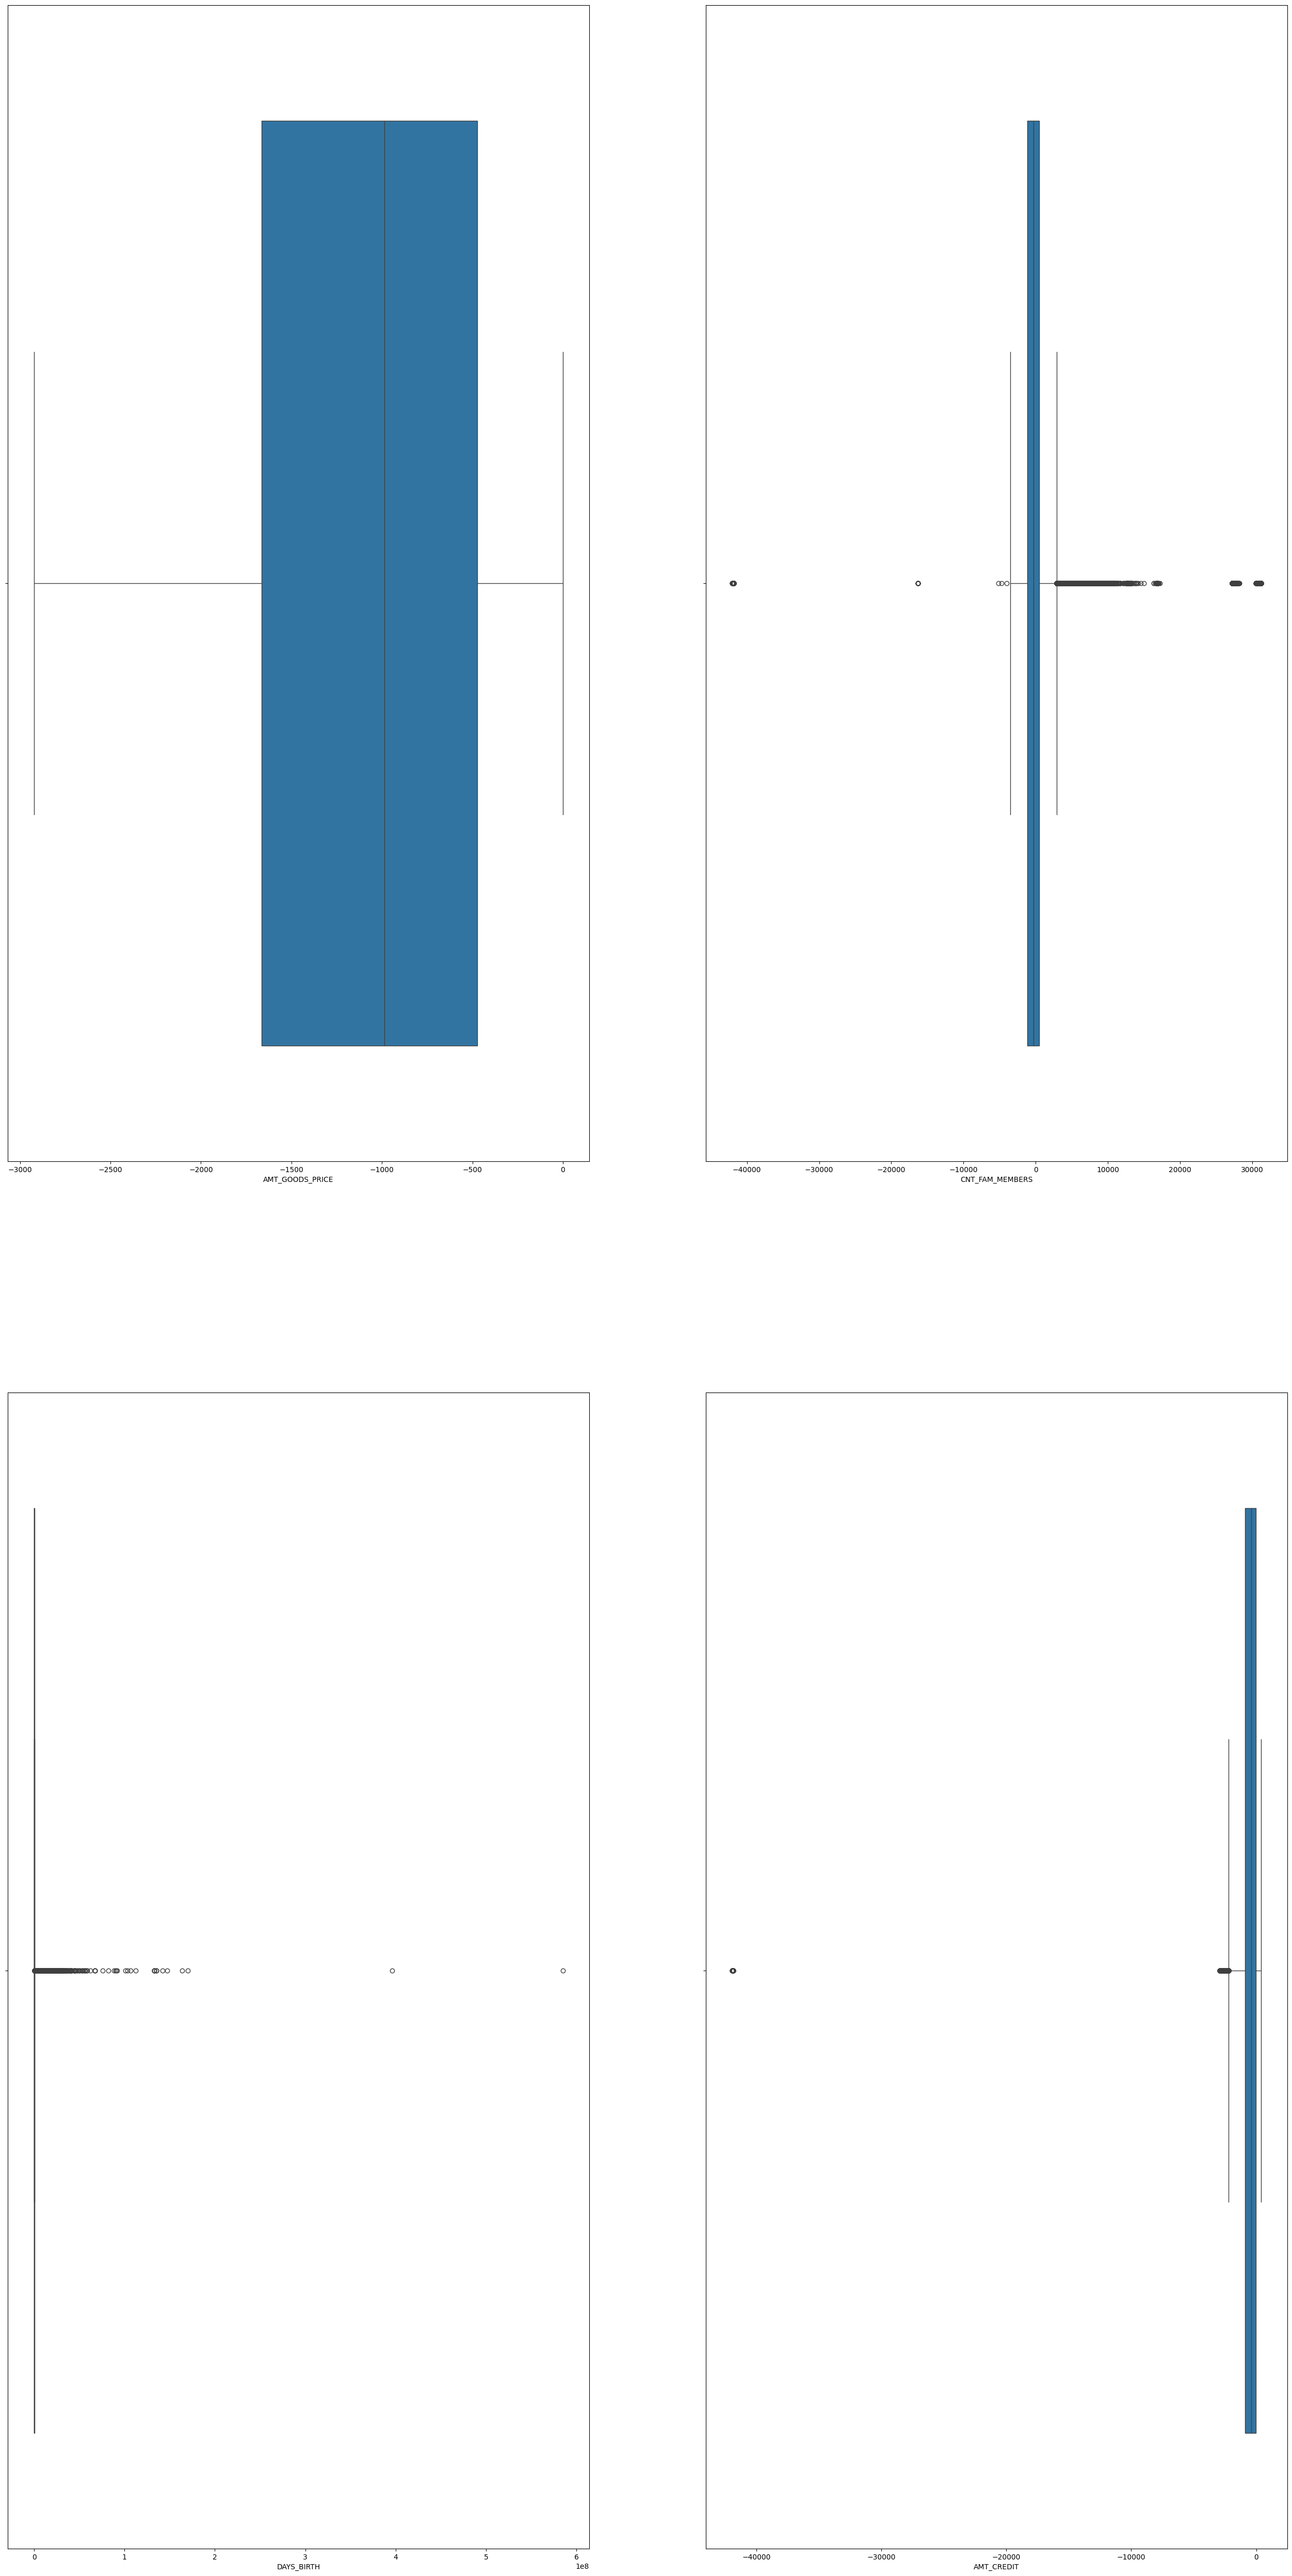

In [74]:
# create boxplots to identify outliers

row_count=int(np.ceil(len(numeric_var_bureau)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=bureauData[numeric_var_bureau[i]],orient='h')
    axis.set_xlabel(str(numeric_var[i]))
    if i == len(numeric_var_bureau)-1: 
         break
    
# Show the plot
plt.show()

## PHASE 2: Data Preparation

##### Filtering application data rows

In [75]:
# FILTERING APPLICATION DATA ROWS

print(f"Number of rows before filtering: {len(appData)}")

# Remove rows where loan amount exceeds 300,000 
filtered_app_data = appData[appData['AMT_CREDIT'] <= 300000]

# Remove rows where applicant is not married
filtered_app_data = filtered_app_data[filtered_app_data['NAME_FAMILY_STATUS'] != "Married"]

# Print the number of rows after filtering
print(f"Number of rows after filtering: {len(filtered_app_data)}")

filtered_app_data

Number of rows before filtering: 307511
Number of rows after filtering: 39704


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
29,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
32,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,20893.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307488,456232,0,Cash loans,F,N,N,0,157500.0,135000.0,13351.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
307490,456234,0,Cash loans,M,N,Y,0,81000.0,135000.0,9148.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# CHECKING ROW COUNTS AND TARGET ROW COUNT

# count occurrences of '0' and '1'
count_zeros = (filtered_app_data['TARGET'] == 0).sum()
count_ones = (filtered_app_data['TARGET'] == 1).sum()

# Calculate total rows
total_rows = len(filtered_app_data['TARGET'])

# Calculate percentages
percent_zeros = (count_zeros / total_rows) * 100
percent_ones = (count_ones / total_rows) * 100

# Print results
print(f"Total rows with '0': {count_zeros}")
print(f"Total rows with '1': {count_ones}")
print(f"Percentage of '0's: {percent_zeros:.4f}%")
print(f"Percentage of '1's: {percent_ones:.4f}%")


Total rows with '0': 36406
Total rows with '1': 3298
Percentage of '0's: 91.6935%
Percentage of '1's: 8.3065%


Based on the above count, we have met the threshold of having minimally 2k goods and 2k bads alongside having 8% of bads as an ideal amount. 

##### Aggregate Bureau Data to flatten

In [77]:
# Define the aggregation methods for each column
agg_methods = {
    'CREDIT_ACTIVE': lambda x: 'Active' if 'Active' in x.values else x.mode().iloc[0], 
    'CREDIT_CURRENCY': lambda x: x.mode().iloc[0], 
    'DAYS_CREDIT': 'mean',
    'CREDIT_DAY_OVERDUE': 'mean',
    'DAYS_CREDIT_ENDDATE': 'mean',
    'DAYS_ENDDATE_FACT': 'mean',
    'AMT_CREDIT_MAX_OVERDUE': 'max',
    'CNT_CREDIT_PROLONG': 'mean',
    'AMT_CREDIT_SUM': 'sum',
    'AMT_CREDIT_SUM_DEBT': 'sum', 
    'AMT_CREDIT_SUM_LIMIT': 'mean', 
    'AMT_CREDIT_SUM_OVERDUE': 'sum', 
    'CREDIT_TYPE': lambda x: x.mode().iloc[0], 
    'DAYS_CREDIT_UPDATE': 'mean',
    'AMT_ANNUITY': 'mean'
}

# Group by SK_ID_CURR and apply the aggregation methods
aggregated_bureau_data = bureauData.groupby('SK_ID_CURR').agg(agg_methods).reset_index()

# Display the first few rows of the aggregated data
print(aggregated_bureau_data.head())

# Display the shape of the aggregated data
print(f"Shape of aggregated data: {aggregated_bureau_data.shape}")

aggregated_bureau_data

   SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      100001        Active      currency 1  -735.000000                 0.0   
1      100002        Active      currency 1  -874.000000                 0.0   
2      100003        Active      currency 1 -1400.750000                 0.0   
3      100004        Closed      currency 1  -867.000000                 0.0   
4      100005        Active      currency 1  -190.666667                 0.0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0            82.428571        -825.500000                     NaN   
1          -349.000000        -697.500000                5043.645   
2          -544.500000       -1097.333333                   0.000   
3          -488.500000        -532.500000                   0.000   
4           439.333333        -123.000000                   0.000   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                 0.0     1453365.000     

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,Active,currency 1,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,1453365.000,596686.500,0.00000,0.0,Consumer credit,-93.142857,3545.357143
1,100002,Active,currency 1,-874.000000,0.0,-349.000000,-697.500000,5043.645,0.000000,865055.565,245781.000,7997.14125,0.0,Consumer credit,-499.875000,0.000000
2,100003,Active,currency 1,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.000000,1017400.500,0.000,202500.00000,0.0,Consumer credit,-816.000000,NaN
3,100004,Closed,currency 1,-867.000000,0.0,-488.500000,-532.500000,0.000,0.000000,189037.800,0.000,0.00000,0.0,Consumer credit,-532.000000,NaN
4,100005,Active,currency 1,-190.666667,0.0,439.333333,-123.000000,0.000,0.000000,657126.000,568408.500,0.00000,0.0,Consumer credit,-54.333333,1420.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,Active,currency 1,-1667.076923,0.0,-1232.333333,-1364.750000,18945.000,0.000000,3693858.660,163071.000,0.00000,0.0,Consumer credit,-1064.538462,NaN
305807,456250,Active,currency 1,-862.000000,0.0,1288.333333,-760.000000,0.000,0.000000,3086459.550,2232040.095,19422.79500,0.0,Consumer credit,-60.333333,154567.965000
305808,456253,Active,currency 1,-867.500000,0.0,280.500000,-794.000000,NaN,0.000000,3960000.000,1795833.000,0.00000,0.0,Consumer credit,-253.250000,58369.500000
305809,456254,Closed,currency 1,-1104.000000,0.0,-859.000000,-859.000000,NaN,0.000000,45000.000,0.000,NaN,0.0,Consumer credit,-401.000000,0.000000


##### Drop rows with invalid/impossible values

In [78]:
# Functions to drop rows based on column name and categorical variable criterias

def drop_invalid_values(df, column_name, valid_values):
    initial_count = len(df)
    df_filtered = df[df[column_name].isin(valid_values)]
    dropped_count = initial_count - len(df_filtered)
    
    print(f"Rows dropped from '{column_name}': {dropped_count}")
    return df_filtered

def drop_outside_range(df, column_name, min_value, max_value):
    initial_count = len(df)
    df_filtered = df[(df[column_name] >= min_value) & (df[column_name] <= max_value)]
    dropped_count = initial_count - len(df_filtered)
    
    print(f"Rows dropped from '{column_name}': {dropped_count}")
    return df_filtered

In [79]:
# REMOVE ROWS WITH INVALID VALUES FROM APPLICATION DATA 

orig_total_rows = filtered_app_data.shape[0]

#Filter based on gender != 'M' or 'F'
filtered_app_data = drop_invalid_values(filtered_app_data, 'CODE_GENDER', ['M', 'F'])

#Filter based on own car status
filtered_app_data = drop_invalid_values(filtered_app_data, 'FLAG_OWN_CAR', ['Y', 'N'])

#Filter based on own realty
filtered_app_data = drop_invalid_values(filtered_app_data, 'FLAG_OWN_REALTY', ['Y', 'N'])

# filter unrealistic number of days (max 100 years)
days_columns_to_filter = [
    "DAYS_BIRTH",
    "DAYS_EMPLOYED", 
    "DAYS_REGISTRATION", 
    "DAYS_ID_PUBLISH"
]

# Apply the filtering function to all columns
for col in days_columns_to_filter:
    filtered_app_data = drop_outside_range(filtered_app_data, col, -36500, 36500)

# filter invalid categorical values (only 1 or 0)
category_columns_to_filter = [
    "FLAG_MOBIL", 
    "FLAG_EMP_PHONE", 
    "FLAG_WORK_PHONE",
    "FLAG_CONT_MOBILE", 
    "FLAG_PHONE", 
    "FLAG_EMAIL", 
    "REG_REGION_NOT_LIVE_REGION", 
    "REG_REGION_NOT_WORK_REGION", 
    "LIVE_REGION_NOT_WORK_REGION", 
    "REG_CITY_NOT_LIVE_CITY", 
    "REG_CITY_NOT_WORK_CITY", 
    "LIVE_CITY_NOT_WORK_CITY", 
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3", 
    "FLAG_DOCUMENT_4", 
    "FLAG_DOCUMENT_5", 
    "FLAG_DOCUMENT_6", 
    "FLAG_DOCUMENT_7", 
    "FLAG_DOCUMENT_8", 
    "FLAG_DOCUMENT_9", 
    "FLAG_DOCUMENT_10", 
    "FLAG_DOCUMENT_11", 
    "FLAG_DOCUMENT_12", 
    "FLAG_DOCUMENT_13", 
    "FLAG_DOCUMENT_14", 
    "FLAG_DOCUMENT_15", 
    "FLAG_DOCUMENT_16", 
    "FLAG_DOCUMENT_17", 
    "FLAG_DOCUMENT_18", 
    "FLAG_DOCUMENT_19", 
    "FLAG_DOCUMENT_20", 
    "FLAG_DOCUMENT_21"
]

# Apply the filtering function to all columns
for col in category_columns_to_filter:
    filtered_app_data = drop_invalid_values(filtered_app_data, col, [0, 1])

# filter invalid numeric values (0 at least)
num_columns_to_filter = [
    "AMT_REQ_CREDIT_BUREAU_HOUR", 
    "AMT_REQ_CREDIT_BUREAU_DAY", 
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON", 
    "AMT_REQ_CREDIT_BUREAU_QRT", 
    "AMT_REQ_CREDIT_BUREAU_YEAR",

    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE", 
    "OBS_60_CNT_SOCIAL_CIRCLE", 
    "DEF_60_CNT_SOCIAL_CIRCLE",

    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT", 
    "AMT_ANNUITY", 
    "AMT_GOODS_PRICE"
]

# Apply the filtering function to all columns
for col in num_columns_to_filter:
    filtered_app_data = drop_outside_range(filtered_app_data, col, 0, float('inf'))


final_total_rows = filtered_app_data.shape[0]

percent_dropped = (orig_total_rows - final_total_rows)/orig_total_rows

print("Start: " + str(orig_total_rows))
print("End: " + str(final_total_rows))
print(str(percent_dropped*100) + "%")



Rows dropped from 'CODE_GENDER': 0
Rows dropped from 'FLAG_OWN_CAR': 0
Rows dropped from 'FLAG_OWN_REALTY': 0
Rows dropped from 'DAYS_BIRTH': 0
Rows dropped from 'DAYS_EMPLOYED': 9727
Rows dropped from 'DAYS_REGISTRATION': 0
Rows dropped from 'DAYS_ID_PUBLISH': 0
Rows dropped from 'FLAG_MOBIL': 0
Rows dropped from 'FLAG_EMP_PHONE': 0
Rows dropped from 'FLAG_WORK_PHONE': 0
Rows dropped from 'FLAG_CONT_MOBILE': 0
Rows dropped from 'FLAG_PHONE': 0
Rows dropped from 'FLAG_EMAIL': 0
Rows dropped from 'REG_REGION_NOT_LIVE_REGION': 0
Rows dropped from 'REG_REGION_NOT_WORK_REGION': 0
Rows dropped from 'LIVE_REGION_NOT_WORK_REGION': 0
Rows dropped from 'REG_CITY_NOT_LIVE_CITY': 0
Rows dropped from 'REG_CITY_NOT_WORK_CITY': 0
Rows dropped from 'LIVE_CITY_NOT_WORK_CITY': 0
Rows dropped from 'FLAG_DOCUMENT_2': 0
Rows dropped from 'FLAG_DOCUMENT_3': 0
Rows dropped from 'FLAG_DOCUMENT_4': 0
Rows dropped from 'FLAG_DOCUMENT_5': 0
Rows dropped from 'FLAG_DOCUMENT_6': 0
Rows dropped from 'FLAG_DOCUMENT

In [80]:
# REMOVE ROWS WITH INVALID VALUES FROM BUREAU DATA 

orig_total_rows = aggregated_bureau_data.shape[0]

# Unreasonable dates: > 50 years ago
# aggregated_bureau_data = drop_outside_range(aggregated_bureau_data, "DAYS_CREDIT", 0, float('inf'))
aggregated_bureau_data = drop_outside_range(aggregated_bureau_data, "DAYS_CREDIT_ENDDATE", -18250, 18250)
aggregated_bureau_data = drop_outside_range(aggregated_bureau_data, "DAYS_ENDDATE_FACT", -18250, 18250)

# Unrealistic values for Credit amounts > 1million/10million (Or maybe the threshold should be much lesser?)
aggregated_bureau_data = drop_outside_range(aggregated_bureau_data, "AMT_CREDIT_MAX_OVERDUE", 0, 100000000)
aggregated_bureau_data = drop_outside_range(aggregated_bureau_data, "AMT_CREDIT_SUM", 0, 1000000)
aggregated_bureau_data = drop_outside_range(aggregated_bureau_data, "AMT_CREDIT_SUM_DEBT", 0, 1000000)
aggregated_bureau_data = drop_outside_range(aggregated_bureau_data, "AMT_CREDIT_SUM_LIMIT", 0, 1000000)
aggregated_bureau_data = drop_outside_range(aggregated_bureau_data, "AMT_CREDIT_SUM_OVERDUE", 0, 1000000)

final_total_rows = aggregated_bureau_data.shape[0]

percent_dropped = (orig_total_rows - final_total_rows)/orig_total_rows

print("Start: " + str(orig_total_rows))
print("End: " + str(final_total_rows))
print(str(percent_dropped*100) + "%")


Rows dropped from 'DAYS_CREDIT_ENDDATE': 4395
Rows dropped from 'DAYS_ENDDATE_FACT': 34246
Rows dropped from 'AMT_CREDIT_MAX_OVERDUE': 70214
Rows dropped from 'AMT_CREDIT_SUM': 113403
Rows dropped from 'AMT_CREDIT_SUM_DEBT': 765
Rows dropped from 'AMT_CREDIT_SUM_LIMIT': 2422
Rows dropped from 'AMT_CREDIT_SUM_OVERDUE': 0
Start: 305811
End: 80366
73.72036977087156%


##### Merge bureau data with application data - using left join

In [81]:
# Merge application data and bureau data
combined_data = filtered_app_data.merge(aggregated_bureau_data, on='SK_ID_CURR', how='left')


# handle the column that exist in both application data and bureau data
# Calculate row-wise mean of the AMT_ANNUITY_x and AMT_ANNUITY_y columns
combined_data['AMT_ANNUITY'] = combined_data[['AMT_ANNUITY_x', 'AMT_ANNUITY_y']].mean(axis=1)

# Drop original columns
combined_data.drop(['AMT_ANNUITY_x', 'AMT_ANNUITY_y'], axis=1, inplace=True)

# Display the first few rows of the combined data
print(combined_data.head())

# Display the shape of the combined data
print(f"Shape of combined data: {combined_data.shape}")

# Check for any missing values after merging
print(combined_data.isnull().sum())

# Optionally, you can save the combined data to a CSV file
combined_data.to_csv('combined_app_bureau_data.csv', index=False)

combined_data

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100004       0    Revolving loans           M            Y   
1      100019       0         Cash loans           M            Y   
2      100022       0    Revolving loans           F            N   
3      100037       0         Cash loans           F            N   
4      100049       1         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0           67500.0    135000.0   
1               Y             0          157500.0    299772.0   
2               Y             0          112500.0    157500.0   
3               N             0           90000.0    199008.0   
4               N             0          135000.0    288873.0   

   AMT_GOODS_PRICE  ... DAYS_ENDDATE_FACT AMT_CREDIT_MAX_OVERDUE  \
0         135000.0  ...       -532.500000                    0.0   
1         247500.0  ...               NaN                 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-532.500000,0.0,0.0,189037.80,0.0,0.000,0.0,Consumer credit,-532.000000,6750.00
1,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,247500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160.00
2,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,157500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7875.00
3,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,180000.0,...,-1728.571429,0.0,0.0,592132.50,0.0,0.000,0.0,Consumer credit,-1544.625000,10446.75
4,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,-1011.500000,0.0,0.0,851747.85,552442.5,1763.847,0.0,Credit card,-374.285714,16258.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24294,456156,0,Cash loans,M,N,N,0,90000.0,119448.0,94500.0,...,-715.750000,0.0,0.0,333724.50,0.0,0.000,0.0,Consumer credit,-390.600000,8939.25
24295,456175,0,Cash loans,F,Y,Y,0,81000.0,180000.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12658.50
24296,456229,0,Revolving loans,F,N,Y,1,270000.0,180000.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.00
24297,456232,0,Cash loans,F,N,N,0,157500.0,135000.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13351.50


In [82]:
# CHECKING ROW COUNTS AND TARGET ROW COUNT - after merging

# count occurrences of '0' and '1'
count_zeros = (combined_data['TARGET'] == 0).sum()
count_ones = (combined_data['TARGET'] == 1).sum()

# Calculate total rows
total_rows = len(combined_data['TARGET'])

# Calculate percentages
percent_zeros = (count_zeros / total_rows) * 100
percent_ones = (count_ones / total_rows) * 100

# Print results
print(f"Total rows with '0': {count_zeros}")
print(f"Total rows with '1': {count_ones}")
print(f"Percentage of '0's: {percent_zeros:.4f}%")
print(f"Percentage of '1's: {percent_ones:.4f}%")


Total rows with '0': 22163
Total rows with '1': 2136
Percentage of '0's: 91.2095%
Percentage of '1's: 8.7905%


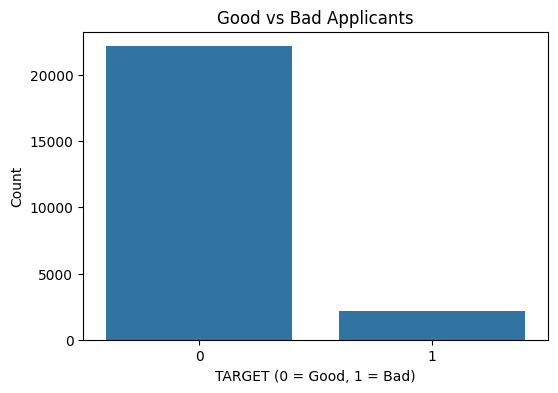

In [83]:
# Distribution of TARGET
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=filtered_app_data)

plt.title("Good vs Bad Applicants")
plt.xlabel("TARGET (0 = Good, 1 = Bad)")
plt.ylabel("Count")
plt.show()

##### Dropping 1 in a pair columns with high correlation (mitigate multicollinearity)

In [84]:

# Prevent multicollinearity for numerical data only.
# Find out pairs with high correlation and drop the column with lower correlation to TARGET 

# Display original column names
print("Original column names:")
print(combined_data.columns.tolist())

# Display the number of columns before dropping correlated columns
print(f"\nNumber of columns before dropping correlated columns: {combined_data.shape[1]}")

# Select only numeric columns
numeric_cols = combined_data.select_dtypes(include=['number'])

# Ensure TARGET is in numeric_cols
if 'TARGET' not in numeric_cols.columns:
    raise ValueError("TARGET column not found in numeric columns")

# Calculate the correlation matrix for numeric columns (excluding TARGET)
correlation_matrix = numeric_cols.drop(columns=['TARGET']).corr()

# Calculate correlation with TARGET
correlation_with_target = numeric_cols.corrwith(combined_data['TARGET'])

# Identify highly correlated pairs (correlation > 0.8 and < 1)
high_corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.8) & (high_corr_pairs < 1)]

# Create a set to store unique pairs
unique_pairs = set()
filtered_pairs = []

for col1, col2 in high_corr_pairs.index:
    # Sort the pair alphabetically to avoid duplicates
    sorted_pair = tuple(sorted((col1, col2)))
    if sorted_pair not in unique_pairs:
        unique_pairs.add(sorted_pair)
        filtered_pairs.append((col1, col2, high_corr_pairs[col1, col2]))

# Display unique pairs
print("\nUnique highly correlated pairs:")
for pair in filtered_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

# Extract columns to drop based on correlation with TARGET
columns_to_drop = set()
already_dropped = set()

print("\nDropping columns based on correlation with TARGET:")
for col1, col2 in unique_pairs:
    if col1 not in already_dropped and col2 not in already_dropped:
        # Drop the column with lower correlation to TARGET
        corr1 = abs(correlation_with_target[col1])
        corr2 = abs(correlation_with_target[col2])
        if corr1 < corr2:
            columns_to_drop.add(col1)
            already_dropped.add(col1)
            print(f"Pair: {col1} (corr: {corr1:.4f}) vs {col2} (corr: {corr2:.4f}) -> Dropping {col1}")
        else:
            columns_to_drop.add(col2)
            already_dropped.add(col2)
            print(f"Pair: {col1} (corr: {corr1:.4f}) vs {col2} (corr: {corr2:.4f}) -> Dropping {col2}")

print("\nColumns to drop due to high correlation:")
print(columns_to_drop)

# Drop the identified columns from combined_data
combined_data_cleaned = combined_data.drop(columns=columns_to_drop)

# Display the number of columns after dropping correlated columns
print(f"\nNumber of columns after dropping correlated columns: {combined_data_cleaned.shape[1]}")

# Display cleaned column names
print("\nCleaned column names:")
print(combined_data_cleaned.columns.tolist())


Original column names:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_

C:\Users\tyeet\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\tyeet\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


## PHASE 3: Grouping and Screening

In [85]:
temp_cleaned = combined_data_cleaned.copy()
temp_cleaned

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY
0,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,Unaccompanied,Working,...,0.0,-488.500000,0.0,0.0,189037.80,0.0,0.000,0.0,Consumer credit,6750.00
1,100019,0,Cash loans,M,Y,Y,157500.0,299772.0,Family,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160.00
2,100022,0,Revolving loans,F,N,Y,112500.0,157500.0,Other_A,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7875.00
3,100037,0,Cash loans,F,N,N,90000.0,199008.0,Unaccompanied,Working,...,0.0,-1696.428571,0.0,0.0,592132.50,0.0,0.000,0.0,Consumer credit,10446.75
4,100049,1,Cash loans,F,N,N,135000.0,288873.0,Unaccompanied,Working,...,0.0,-117.166667,0.0,0.0,851747.85,552442.5,1763.847,0.0,Credit card,16258.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24294,456156,0,Cash loans,M,N,N,90000.0,119448.0,Unaccompanied,Working,...,0.0,-511.200000,0.0,0.0,333724.50,0.0,0.000,0.0,Consumer credit,8939.25
24295,456175,0,Cash loans,F,Y,Y,81000.0,180000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12658.50
24296,456229,0,Revolving loans,F,N,Y,270000.0,180000.0,Family,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.00
24297,456232,0,Cash loans,F,N,N,157500.0,135000.0,Unaccompanied,State servant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13351.50


##### Fine Classing: Get the WOE and IV then keep the top 15 characteristics to conduct coarse classing

In [86]:
def calculate_woe_iv_for_column(data, column, target, bins=10):
    # Ensure the column is numeric before binning
    if data[column].dtype in ['float64', 'int64']:
        try:
            data[column], bins = pd.qcut(data[column], bins, duplicates='drop', retbins=True)
        except ValueError:
            return None

    # Calculate WOE and IV
    grouped = data.groupby(column)[target].agg(['count', 'sum'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
    grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
    grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
    grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']
    return grouped['iv'].sum()

# Calculate IV values (already excludes TARGET and code_gender)
iv_values = {}
for col in temp_cleaned.columns:
    if col not in ['TARGET']:  # Explicit exclusion
        iv = calculate_woe_iv_for_column(temp_cleaned, col, 'TARGET')
        if iv is not None:
            iv_values[col] = iv

# Select top 15 variables by IV
sorted_iv = sorted(iv_values.items(), key=lambda x: x[1], reverse=True)[:15]
top_15_cols = [col for col, iv in sorted_iv]

# Keep only top predictors + target
temp_cleaned_fineclassing = temp_cleaned[top_15_cols + ['TARGET']]
print(f"Top 15 variables: {top_15_cols}")

C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\456430425.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(column)[target].agg(['count', 'sum'])
C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\456430425.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(column)[target].agg(['count', 'sum'])
C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\456430425.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

Top 15 variables: ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'CREDIT_TYPE', 'EXT_SOURCE_1', 'DAYS_CREDIT', 'DAYS_EMPLOYED', 'AMT_CREDIT_SUM_DEBT', 'OCCUPATION_TYPE', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'CODE_GENDER', 'DAYS_BIRTH', 'FLOORSMIN_MODE', 'DAYS_LAST_PHONE_CHANGE']


C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\456430425.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(column)[target].agg(['count', 'sum'])
C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\456430425.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(column)[target].agg(['count', 'sum'])
C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\456430425.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

In [87]:
# Define predictive strength categories
def get_predictive_strength(iv):
    if iv < 0.02:
        return "Not Predictive"
    elif iv < 0.1:
        return "Weak Predictive"
    elif iv < 0.3:
        return "Medium Predictive"
    elif iv < 0.5:
        return "Strong Predictive"
    else:
        return "Suspicious Predictive"

# Print IV values and predictive strength for remaining columns
print("IV Values and Predictive Strength of Remaining Columns:")
for col in temp_cleaned_fineclassing.columns:
    if col in iv_values:  # Ensure the column has IV calculated
        iv = iv_values[col]
        strength = get_predictive_strength(iv)
        print(f"{col}: IV = {iv:.4f}, Predictive Strength = {strength}")

IV Values and Predictive Strength of Remaining Columns:
NAME_INCOME_TYPE: IV = inf, Predictive Strength = Suspicious Predictive
NAME_EDUCATION_TYPE: IV = inf, Predictive Strength = Suspicious Predictive
ORGANIZATION_TYPE: IV = inf, Predictive Strength = Suspicious Predictive
CREDIT_TYPE: IV = inf, Predictive Strength = Suspicious Predictive
EXT_SOURCE_1: IV = 0.3154, Predictive Strength = Strong Predictive
DAYS_CREDIT: IV = 0.1074, Predictive Strength = Medium Predictive
DAYS_EMPLOYED: IV = 0.1050, Predictive Strength = Medium Predictive
AMT_CREDIT_SUM_DEBT: IV = 0.0979, Predictive Strength = Weak Predictive
OCCUPATION_TYPE: IV = 0.0893, Predictive Strength = Weak Predictive
DAYS_CREDIT_ENDDATE: IV = 0.0765, Predictive Strength = Weak Predictive
AMT_CREDIT_MAX_OVERDUE: IV = 0.0751, Predictive Strength = Weak Predictive
CODE_GENDER: IV = 0.0665, Predictive Strength = Weak Predictive
DAYS_BIRTH: IV = 0.0648, Predictive Strength = Weak Predictive
FLOORSMIN_MODE: IV = 0.0573, Predictive St

Top 15 variables: 

[
    'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 
    'ORGANIZATION_TYPE', 
    'CREDIT_TYPE', 
    'EXT_SOURCE_1', 
    'DAYS_CREDIT', 
    'DAYS_EMPLOYED', 
    'AMT_CREDIT_SUM_DEBT', 
    'OCCUPATION_TYPE', 
    'DAYS_CREDIT_ENDDATE',
    'AMT_CREDIT_MAX_OVERDUE', 
    'CODE_GENDER', 
    'DAYS_BIRTH', 
    'FLOORSMIN_MODE', 
    'DAYS_LAST_PHONE_CHANGE'
]

##### Dropping CREDIT_TYPE and CODE_GENDER
CODE_GENDER shows biasness if placed on a credit scorecard and CREDIT_TYPE is not logical on a credit scorecard

In [88]:
temp_cleaned_fineclassing.drop('CREDIT_TYPE', axis=1, inplace=True)
temp_cleaned_fineclassing.drop('CODE_GENDER', axis=1, inplace=True)

C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\2361201014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_cleaned_fineclassing.drop('CREDIT_TYPE', axis=1, inplace=True)
C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\2361201014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_cleaned_fineclassing.drop('CODE_GENDER', axis=1, inplace=True)


##### Leftover variables

Top 13 variables: 

[
    'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 
    'ORGANIZATION_TYPE', 
    'EXT_SOURCE_1', 
    'DAYS_CREDIT', 
    'DAYS_EMPLOYED', 
    'AMT_CREDIT_SUM_DEBT', 
    'OCCUPATION_TYPE', 
    'DAYS_CREDIT_ENDDATE',
    'AMT_CREDIT_MAX_OVERDUE', 
    'DAYS_BIRTH', 
    'FLOORSMIN_MODE', 
    'DAYS_LAST_PHONE_CHANGE'
]

In [89]:
# Define predictive strength categories
def get_predictive_strength(iv):
    if iv < 0.02:
        return "Not Predictive"
    elif iv < 0.1:
        return "Weak Predictive"
    elif iv < 0.3:
        return "Medium Predictive"
    elif iv < 0.5:
        return "Strong Predictive"
    else:
        return "Suspicious Predictive"

# Print IV values and predictive strength for remaining columns
print("IV Values and Predictive Strength of Remaining Columns:")
for col in temp_cleaned_fineclassing.columns:
    if col in iv_values:  # Ensure the column has IV calculated
        iv = iv_values[col]
        strength = get_predictive_strength(iv)
        print(f"{col}: IV = {iv:.4f}, Predictive Strength = {strength}")

IV Values and Predictive Strength of Remaining Columns:
NAME_INCOME_TYPE: IV = inf, Predictive Strength = Suspicious Predictive
NAME_EDUCATION_TYPE: IV = inf, Predictive Strength = Suspicious Predictive
ORGANIZATION_TYPE: IV = inf, Predictive Strength = Suspicious Predictive
EXT_SOURCE_1: IV = 0.3154, Predictive Strength = Strong Predictive
DAYS_CREDIT: IV = 0.1074, Predictive Strength = Medium Predictive
DAYS_EMPLOYED: IV = 0.1050, Predictive Strength = Medium Predictive
AMT_CREDIT_SUM_DEBT: IV = 0.0979, Predictive Strength = Weak Predictive
OCCUPATION_TYPE: IV = 0.0893, Predictive Strength = Weak Predictive
DAYS_CREDIT_ENDDATE: IV = 0.0765, Predictive Strength = Weak Predictive
AMT_CREDIT_MAX_OVERDUE: IV = 0.0751, Predictive Strength = Weak Predictive
DAYS_BIRTH: IV = 0.0648, Predictive Strength = Weak Predictive
FLOORSMIN_MODE: IV = 0.0573, Predictive Strength = Weak Predictive
DAYS_LAST_PHONE_CHANGE: IV = 0.0549, Predictive Strength = Weak Predictive


##### Coarse classing

In [30]:
# prep to do coarse classing
temp_data = combined_data_cleaned.copy()

In [31]:
temp_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY
0,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,Unaccompanied,Working,...,0.0,-488.500000,0.0,0.0,189037.80,0.0,0.000,0.0,Consumer credit,6750.00
1,100019,0,Cash loans,M,Y,Y,157500.0,299772.0,Family,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160.00
2,100022,0,Revolving loans,F,N,Y,112500.0,157500.0,Other_A,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7875.00
3,100037,0,Cash loans,F,N,N,90000.0,199008.0,Unaccompanied,Working,...,0.0,-1696.428571,0.0,0.0,592132.50,0.0,0.000,0.0,Consumer credit,10446.75
4,100049,1,Cash loans,F,N,N,135000.0,288873.0,Unaccompanied,Working,...,0.0,-117.166667,0.0,0.0,851747.85,552442.5,1763.847,0.0,Credit card,16258.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24294,456156,0,Cash loans,M,N,N,90000.0,119448.0,Unaccompanied,Working,...,0.0,-511.200000,0.0,0.0,333724.50,0.0,0.000,0.0,Consumer credit,8939.25
24295,456175,0,Cash loans,F,Y,Y,81000.0,180000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12658.50
24296,456229,0,Revolving loans,F,N,Y,270000.0,180000.0,Family,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.00
24297,456232,0,Cash loans,F,N,N,157500.0,135000.0,Unaccompanied,State servant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13351.50


In [ ]:
def woe_iv(data, variable_name):

    working_data = data.copy() 

    # missing values have been assigned NaN when binning with pd.qcut
    # rename this bin as 'Missing' to consider into WOE calculation
    working_data['Bin_Range'] = working_data['Bin_Range'].astype('object')
    working_data['Bin_Range'].fillna('Missing', inplace = True)
    
    variable_data = pd.DataFrame()
    variable_data['Bin_Range'] = working_data.groupby(by='Bin_Range', as_index=False).count()['Bin_Range']

    variable_data['Count'] = working_data.groupby(by='Bin_Range', as_index=False).count()['TARGET']

    variable_data['Events'] =working_data.groupby(by='Bin_Range', as_index=False).sum()['TARGET']

    variable_data['Non_Events'] = variable_data['Count'] - variable_data['Events']

    variable_data['%_of_Events'] = variable_data['Events']/sum(variable_data['Events'])

    variable_data['%_of_Non_Events'] = variable_data['Non_Events']/sum(variable_data['Non_Events'])
    variable_data

    variable_data['WOE'] = np.log(variable_data['%_of_Non_Events'] / variable_data['%_of_Events'])

    variable_data['IV'] = (variable_data['%_of_Non_Events']-variable_data['%_of_Events']) * variable_data['WOE']

    IV = sum(variable_data['IV'])
    return(IV, variable_data)


def woe_iv_plot(data, variable_name):
    IV, variable_data = woe_iv(data, variable_name)
    print('IV for', variable_name, 'with', variable_data.shape[0], 'bins:', round(IV,4))
    ffig, ax1 = plt.subplots(figsize=(20,6))

    # print bin and its respective WOE
    print("\n".join([f"Bin {row['Bin_Range']}: WOE = {row['WOE']:.4f}" for _, row in variable_data.iterrows()]))

    # if 'missing' bin, do not include in plot

    if variable_data['Bin_Range'].isin(['Missing']).sum() > 0:
        sns.lineplot(data = variable_data['WOE'].iloc[0:-1], marker='o', sort = False, ax=ax1)
    else:
        sns.lineplot(data = variable_data['WOE'], marker='o', sort = False, ax=ax1)
    plt.xticks(rotation=45)

    # if 'missing' bin, create the scatter plot to plot the Missing WOE data point
    if variable_data['Bin_Range'].isin(['Missing']).sum() > 0: 
        last_point = len(variable_data['WOE']) - 1
        scatter_plot = sns.scatterplot(x=[last_point], y=[variable_data['WOE'][last_point]], color='b', s=30, ax=ax1)
    
    ax2 = ax1.twinx()
        
    # plot the bin counts
    sns.barplot(x = variable_data['Bin_Range'] , y = variable_data['Count'], alpha=0.5, ax = ax2, color = 'deepskyblue')
    plt.title("WOE plot for " + variable_name)
    plt.show()


IV for DAYS_LAST_PHONE_CHANGE = 0.052
IV for DAYS_LAST_PHONE_CHANGE with 7 bins: 0.0519
Bin (-4173.001, -1774.0]: WOE = 0.4610
Bin (-1774.0, -1252.0]: WOE = 0.1790
Bin (-1252.0, -782.0]: WOE = 0.1386
Bin (-782.0, -512.0]: WOE = -0.0802
Bin (-512.0, -299.0]: WOE = -0.0976
Bin (-299.0, -2.0]: WOE = -0.2927
Bin (-2.0, 0.0]: WOE = -0.1505


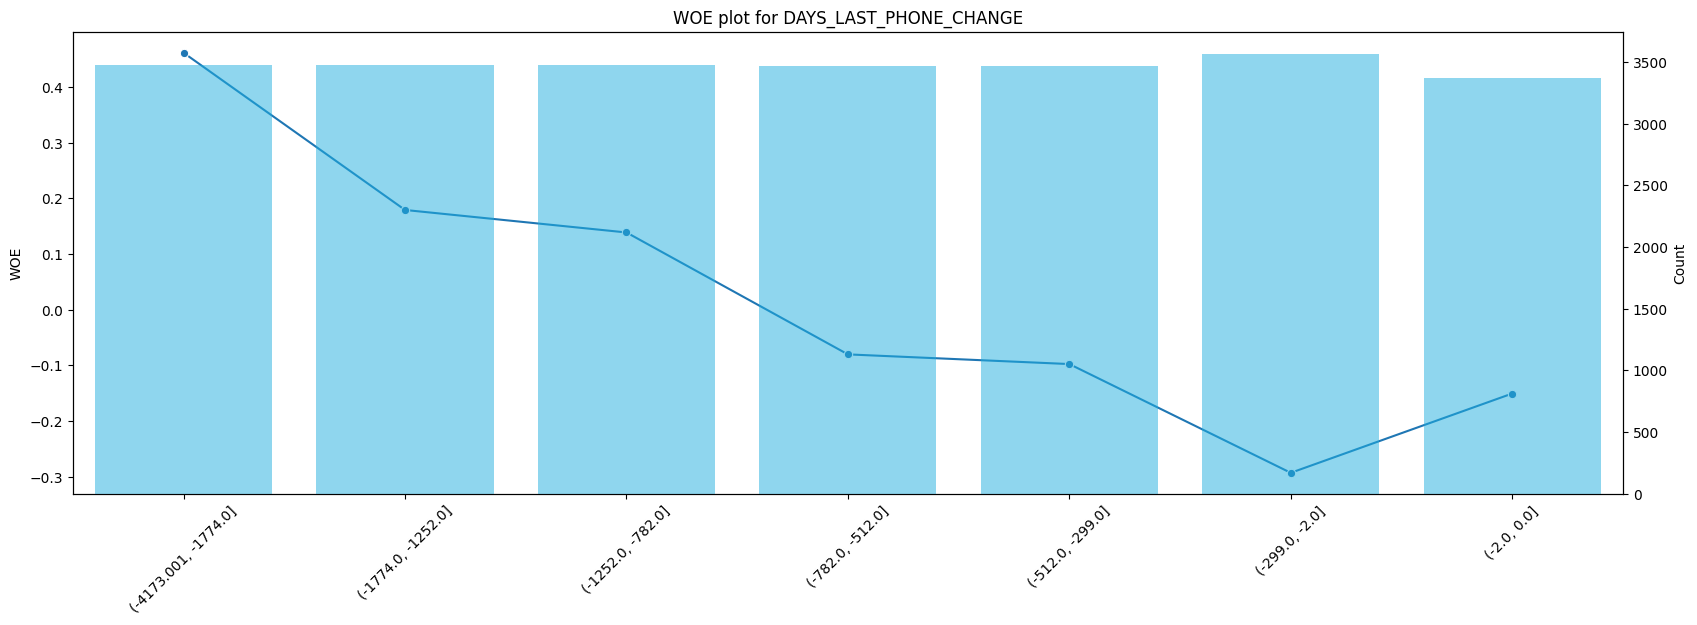

In [ ]:
# get the original fine classing bins
variable = 'DAYS_LAST_PHONE_CHANGE'
woe_bin_data = temp_data.loc[:,(variable, 'TARGET')]
woe_bin_data['Bin_Range'] = pd.qcut(temp_data[variable],q=7)
print(f"IV for {variable} = {woe_iv(woe_bin_data, variable)[0]:.3f}")
woe_iv(woe_bin_data, variable)
woe_iv_plot(woe_bin_data, variable)


##### Coarse Classing: Get the bins for the numeric characteristics 


['NAME_INCOME_TYPE'] (categorical)<br>
['NAME_EDUCATION_TYPE']  (categorical)<br>
['ORGANIZATION_TYPE']  (categorical)<br>
['OCCUPATION_TYPE']  (categorical)<br>

['EXT_SOURCE_1'] (numeric)<br>
['DAYS_CREDIT']  (numeric)<br>
['DAYS_EMPLOYED']  (numeric)<br>
['AMT_CREDIT_SUM_DEBT']  (numeric)<br>
['DAYS_CREDIT_ENDDATE']  (numeric)<br>
['AMT_CREDIT_MAX_OVERDUE']  (numeric)<br>
['DAYS_BIRTH']  (numeric)<br>
['FLOORSMIN_MODE']  (numeric)<br>
['DAYS_LAST_PHONE_CHANGE']  (numeric)<br>

Total 9 Numeric, 4 Categorical


##### First attempt

In [ ]:
# coarse classing to manually adjust the bins to improve the IV and make it monotonic for the top 15

# variable = 'EXT_SOURCE_1'
# bin_edges = [idk] #0.3154 - original set
# bin_edges = [0, 0.2, 0.4, 0.65, 0.8, 1] #0.1481 - optimal

# variable = 'DAYS_CREDIT'
# bin_edges = [-2900, -900, -600, -500, 0] #0.0338 - optimal

# variable = 'DAYS_EMPLOYED'
# bin_edges = [-18000, -11500, -5500, -2500, -1500,  0] #0.1232 - optimal

# variable = 'AMT_CREDIT_SUM_DEBT'
# bin_edges = [-0.001, 14000, 26000, 29821] #0.0507 - optimal

# variable = 'DAYS_CREDIT_ENDDATE'
# bin_edges = [-14300.0, -400.0, -200, 17000] #0.0268 - optimal

# variable = 'AMT_CREDIT_MAX_OVERDUE'
# bin_edges = [0, 2400, 5800, 2400000] #0.0276 - optimal

# variable = 'DAYS_BIRTH'
# bin_edges = [-25000, -22000, -19000, -14609, 0] #0.0697 - optimal

# variable = 'FLOORSMIN_MODE'
# bin_edges = [0,  0.375, 0.5, 1] #0.0222 - optimal

# variable = 'DAYS_LAST_PHONE_CHANGE'
# bin_edges = [-4200, -2000, -1200, -850, -700, -300, 0] #0.0507 - optimal

# variable = 'OWN_CAR_AGE'
# bin_edges = [0, 1, 1.5, 2, 6, 8] #0.0138 - optimal

# temp_data['Bin_Range'] = pd.cut(temp_data[variable], bins = bin_edges, include_lowest= True)
# temp_data['Bin_Range'].value_counts().sort_index()
# woe_iv_plot(temp_data, variable)

##### Second attempt

IV for EXT_SOURCE_1 with 4 bins: 0.126
Bin (-0.001, 0.4]: WOE = -0.2593
Bin (0.4, 0.65]: WOE = 0.4987
Bin (0.65, 1.0]: WOE = 1.1565
Bin Missing: WOE = -0.1064


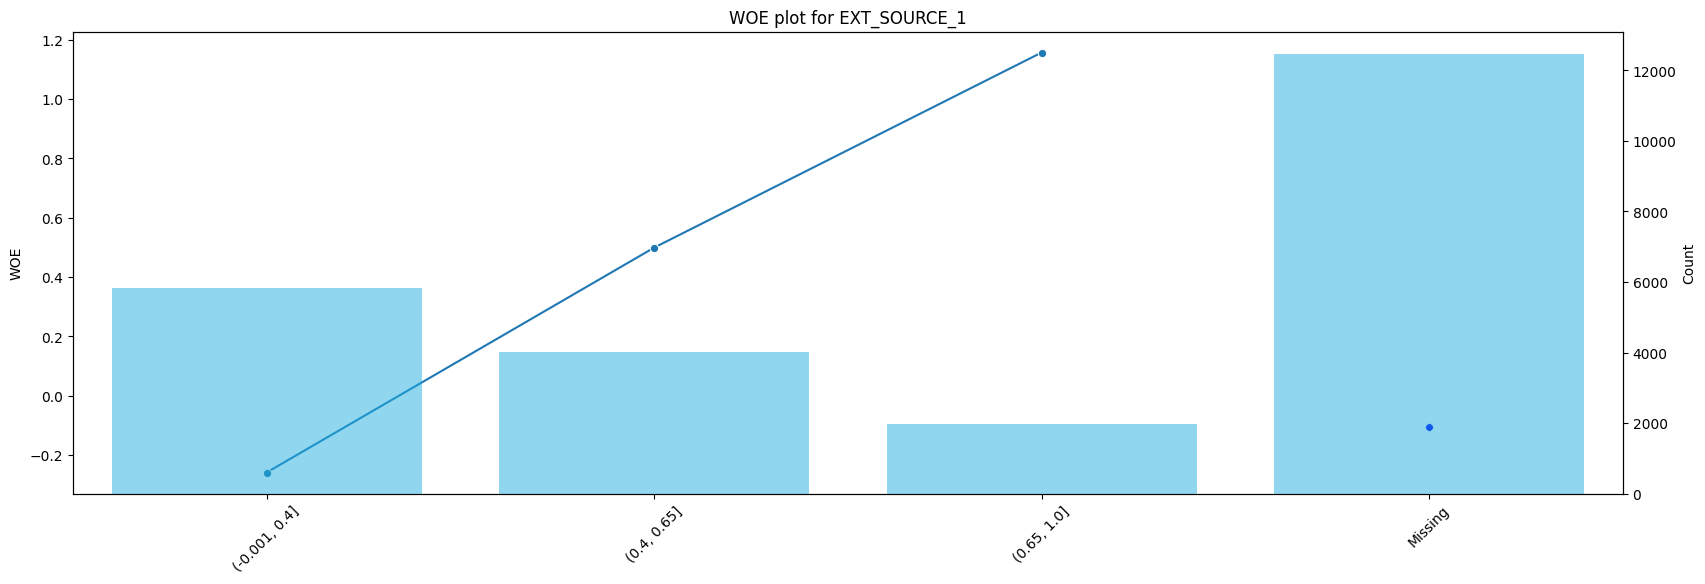

In [ ]:
# coarse classing to manually adjust the bins to improve the IV and make it monotonic for the top 15

variable = 'EXT_SOURCE_1'
bin_edges = [0, 0.4, 0.65, 1] 

# variable = 'DAYS_CREDIT'
# bin_edges = [-1000, -500, 0] 

# variable = 'DAYS_EMPLOYED'
# bin_edges = [-11500, -5500, -2500, -1500]

# variable = 'AMT_CREDIT_SUM_DEBT'
# bin_edges = [0, 10000, 150000, 1000000]

# variable = 'DAYS_CREDIT_ENDDATE'
# bin_edges = [-14300, -500, -200]

# variable = 'AMT_CREDIT_MAX_OVERDUE'
# bin_edges = [0, 50, 3000, 5800, 2400000]

# variable = 'DAYS_BIRTH'
# bin_edges = [-30000, -20000, -18000, -13000, -7000] 

# variable = 'FLOORSMIN_MODE'
# bin_edges = [0, 0.21, 0.375] 

# variable = 'DAYS_LAST_PHONE_CHANGE'
# bin_edges = [-4000, -2000, -1000, -300]


temp_data['Bin_Range'] = pd.cut(temp_data[variable], bins = bin_edges, include_lowest= True)
temp_data['Bin_Range'].value_counts().sort_index()
woe_iv_plot(temp_data, variable)

##### Checking for breakdown to ensure there is sufficient non-events and events as well as meeting 5% of the observations per bin

In [36]:
bin_counts = temp_data['Bin_Range'].value_counts().sort_index()

# Breakdown of rows with TARGET as 0 and TARGET as 1 for each bin
target_breakdown = temp_data.groupby(['Bin_Range', 'TARGET']).size().unstack(fill_value=0)

# Calculate percentages for TARGET = 0 and TARGET = 1
percentages = target_breakdown.div(target_breakdown.sum(axis=1), axis=0) * 100

# Display results
print("Bin Counts:")
print(bin_counts)
print("\nTarget Breakdown (Counts):")
print(target_breakdown)
print("\nTarget Breakdown (Percentages):")
print(percentages)

Bin Counts:
Bin_Range
(-0.001, 0.4]    5836
(0.4, 0.65]      4015
(0.65, 1.0]      1971
Name: count, dtype: int64

Target Breakdown (Counts):
TARGET            0    1
Bin_Range               
(-0.001, 0.4]  5188  648
(0.4, 0.65]    3793  222
(0.65, 1.0]    1913   58

Target Breakdown (Percentages):
TARGET                 0          1
Bin_Range                          
(-0.001, 0.4]  88.896504  11.103496
(0.4, 0.65]    94.470735   5.529265
(0.65, 1.0]    97.057331   2.942669


C:\Users\tyeet\AppData\Local\Temp\ipykernel_21312\903591893.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_breakdown = temp_data.groupby(['Bin_Range', 'TARGET']).size().unstack(fill_value=0)


##### View all the WOE and count for each numeric characteristics bins

##### First attempt collated

In [ ]:
# # COLLATED
# variable_bins = [
#     # Categorical 
#     # ["NAME_INCOME_TYPE", ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']],
#     # ["NAME_EDUCATION_TYPE", ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']],
#     # ["ORGANIZATION_TYPE", ['Government', 'Business Entity Type 2', 'Housing', 'Self-employed', 'University', 'Construction', 'Agriculture', 'Restaurant', 'Business Entity Type 3', 'Trade: type 3', 'Other', 'Hotel','Bank', 'Industry: type 9', 'Military', 'School', 'Trade: type 7', 'Security', 'Medicine', 'Services', 'Kindergarten', 'Industry: type 3', 'Postal', 'Electricity', 'Business Entity Type 1', 'Industry: type 11', 'Industry: type 13', 'Transport: type 4', 'Trade: type 2', 'Insurance', 'Transport: type 2', 'Industry: type 7', 'Industry: type 12', 'Industry: type 4', 'Mobile', 'Telecom', 'Trade: type 6', 'Legal Services', 'Culture', 'Police', 'Security Ministries', 'Transport: type 3', 'Advertising', 'Industry: type 5', 'Industry: type 1', 'Emergency', 'Cleaning', 'Industry: type 6', 'Trade: type 1', 'Realtor', 'Industry: type 10', 'Industry: type 2', 'Trade: type 4', 'Transport: type 1', 'Industry: type 8', 'Religion', 'Trade: type 5']],
#     # ["OCCUPATION_TYPE", ['Laborers', 'Sales staff', nan, 'Low-skill Laborers','Accountants', 'Private service staff', 'Core staff','Cooking staff', 'Drivers', 'Cleaning staff', 'Medicine staff', 'High skill tech staff', 'Realty agents', 'Secretaries', 'Managers', 'Security staff', 'HR staff', 'Waiters/barmen staff', 'IT staff']],
#     # ["CREDIT_TYPE", ['Consumer credit', 'Credit card', 'Microloan', 'Car loan', 'Another type of loan']],
    
#     # Numeric 
#     ["EXT_SOURCE_1", [0, 0.2, 0.4, 0.65, 0.8, 1]], 
#     ["OWN_CAR_AGE", [0, 4, 8, 13, 26]], 
#     ["DAYS_CREDIT", [-2900, -900, -600, -500, 0]],
#     ["DAYS_EMPLOYED", [-18000, -11500, -5500, -2500, -1500,  0]],
#     ["AMT_CREDIT_SUM_DEBT", [-0.001, 14000, 26000, 29821]],
#     ["DAYS_CREDIT_ENDDATE", [-14300.0, -400.0, -200, 17000]],
#     ["AMT_CREDIT_MAX_OVERDUE", [0, 2400, 5800, 2400000]],
#     ["DAYS_BIRTH", [-25000, -22000, -19000, -14609, 0]],
#     ["FLOORSMIN_MODE", [0,  0.375, 0.5, 1]],
#     ["DAYS_LAST_PHONE_CHANGE", [-4200, -2000, -1200, -850, -700, -300, 0]],
# ]

##### Second attempt collated

In [ ]:
# # COLLATED
# variable_bins = [
#     # Categorical 
#     # ["NAME_INCOME_TYPE", ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']],
#     # ["NAME_EDUCATION_TYPE", ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']],
#     # ["ORGANIZATION_TYPE", ['Government', 'Business Entity Type 2', 'Housing', 'Self-employed', 'University', 'Construction', 'Agriculture', 'Restaurant', 'Business Entity Type 3', 'Trade: type 3', 'Other', 'Hotel','Bank', 'Industry: type 9', 'Military', 'School', 'Trade: type 7', 'Security', 'Medicine', 'Services', 'Kindergarten', 'Industry: type 3', 'Postal', 'Electricity', 'Business Entity Type 1', 'Industry: type 11', 'Industry: type 13', 'Transport: type 4', 'Trade: type 2', 'Insurance', 'Transport: type 2', 'Industry: type 7', 'Industry: type 12', 'Industry: type 4', 'Mobile', 'Telecom', 'Trade: type 6', 'Legal Services', 'Culture', 'Police', 'Security Ministries', 'Transport: type 3', 'Advertising', 'Industry: type 5', 'Industry: type 1', 'Emergency', 'Cleaning', 'Industry: type 6', 'Trade: type 1', 'Realtor', 'Industry: type 10', 'Industry: type 2', 'Trade: type 4', 'Transport: type 1', 'Industry: type 8', 'Religion', 'Trade: type 5']],
#     # ["OCCUPATION_TYPE", ['Laborers', 'Sales staff', nan, 'Low-skill Laborers','Accountants', 'Private service staff', 'Core staff','Cooking staff', 'Drivers', 'Cleaning staff', 'Medicine staff', 'High skill tech staff', 'Realty agents', 'Secretaries', 'Managers', 'Security staff', 'HR staff', 'Waiters/barmen staff', 'IT staff']],
    
#     # Numeric 
#     ["EXT_SOURCE_1", [0, 0.4, 0.65, 1]], 
#     ["DAYS_CREDIT", [-1000, -500, 0]],
#     ["DAYS_EMPLOYED", [-11500, -5500, -2500, -1500]],
#     ["AMT_CREDIT_SUM_DEBT", [0, 10000, 150000, 1000000]],
#     ["DAYS_CREDIT_ENDDATE", [-14300, -700, -200]],
#     ["AMT_CREDIT_MAX_OVERDUE", [0, 50, 3000, 5800, 2400000]],
#     ["DAYS_BIRTH", [-30000, -20000, -18000, -13000, -9000, 0]],
#     ["FLOORSMIN_MODE", [0, 0.3, 0.375]],
#     ["DAYS_LAST_PHONE_CHANGE", [-5000, -1700, -1100, -600, 0]],

# ]

##### Third attempt collated

In [154]:
# COLLATED
variable_bins = [
    # Categorical 
    # ["NAME_INCOME_TYPE", ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']],
    # ["NAME_EDUCATION_TYPE", ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']],
    # ["ORGANIZATION_TYPE", ['Government', 'Business Entity Type 2', 'Housing', 'Self-employed', 'University', 'Construction', 'Agriculture', 'Restaurant', 'Business Entity Type 3', 'Trade: type 3', 'Other', 'Hotel','Bank', 'Industry: type 9', 'Military', 'School', 'Trade: type 7', 'Security', 'Medicine', 'Services', 'Kindergarten', 'Industry: type 3', 'Postal', 'Electricity', 'Business Entity Type 1', 'Industry: type 11', 'Industry: type 13', 'Transport: type 4', 'Trade: type 2', 'Insurance', 'Transport: type 2', 'Industry: type 7', 'Industry: type 12', 'Industry: type 4', 'Mobile', 'Telecom', 'Trade: type 6', 'Legal Services', 'Culture', 'Police', 'Security Ministries', 'Transport: type 3', 'Advertising', 'Industry: type 5', 'Industry: type 1', 'Emergency', 'Cleaning', 'Industry: type 6', 'Trade: type 1', 'Realtor', 'Industry: type 10', 'Industry: type 2', 'Trade: type 4', 'Transport: type 1', 'Industry: type 8', 'Religion', 'Trade: type 5']],
    # ["OCCUPATION_TYPE", ['Laborers', 'Sales staff', nan, 'Low-skill Laborers','Accountants', 'Private service staff', 'Core staff','Cooking staff', 'Drivers', 'Cleaning staff', 'Medicine staff', 'High skill tech staff', 'Realty agents', 'Secretaries', 'Managers', 'Security staff', 'HR staff', 'Waiters/barmen staff', 'IT staff']],
    
    # Numeric 
    ["EXT_SOURCE_1", [0, 0.4, 0.65, 1]], 
    ["DAYS_CREDIT", [-1000, -500, 0]],
    ["DAYS_EMPLOYED", [-11500, -5500, -2500, -1500]],
    ["AMT_CREDIT_SUM_DEBT", [0, 10000, 150000, 1000000]],
    ["AMT_CREDIT_MAX_OVERDUE", [0, 50, 3000, 5800, 2400000]],
    ["DAYS_BIRTH", [-30000, -20000, -18000, -13000, -8000]],
    ["DAYS_CREDIT_ENDDATE", [-14300, -500, -200]],
    ["FLOORSMIN_MODE", [0, 0.3, 0.375] ],
    ["DAYS_LAST_PHONE_CHANGE", [-3000, -2000, -1000, -300]],

]

IV for EXT_SOURCE_1 with 4 bins: 0.126
Bin (-0.001, 0.4]: WOE = -0.2593
Bin (0.4, 0.65]: WOE = 0.4987
Bin (0.65, 1.0]: WOE = 1.1565
Bin Missing: WOE = -0.1064


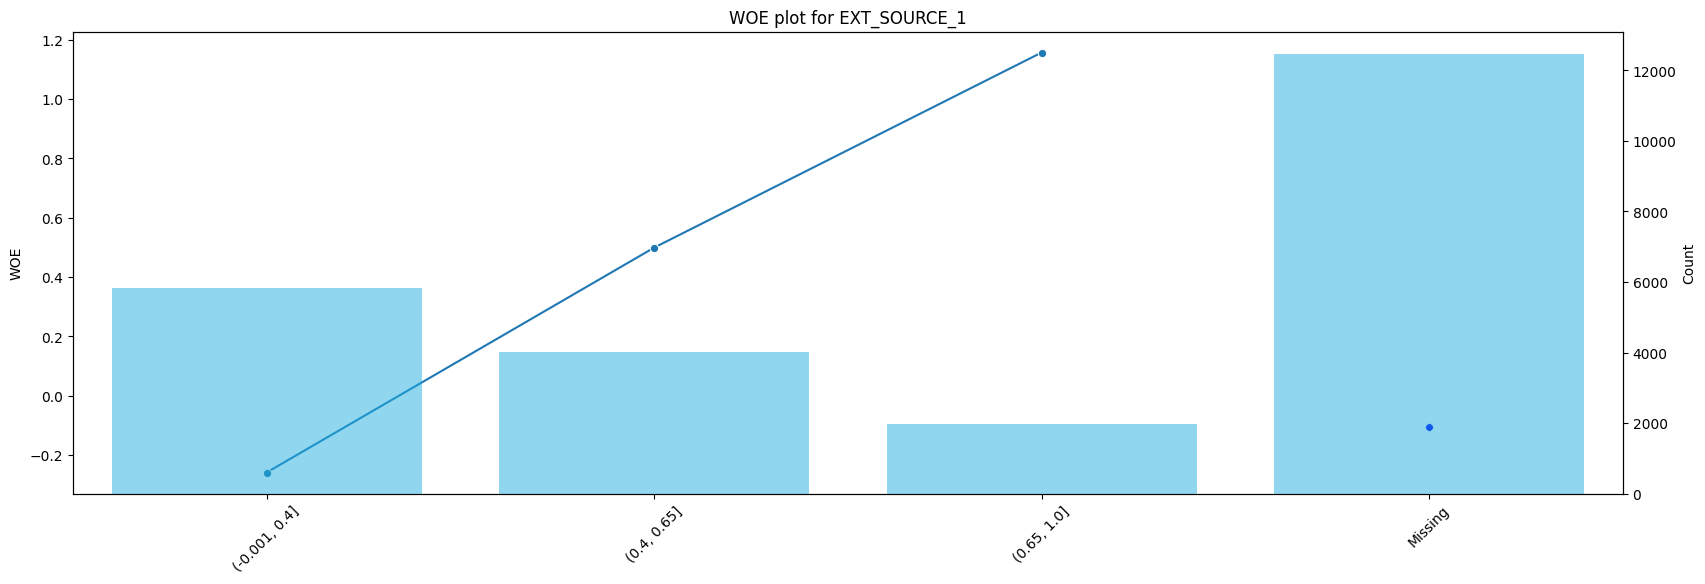

IV for DAYS_CREDIT with 3 bins: 0.0161
Bin (-1000.001, -500.0]: WOE = 0.1208
Bin (-500.0, 0.0]: WOE = -0.4124
Bin Missing: WOE = 0.0258


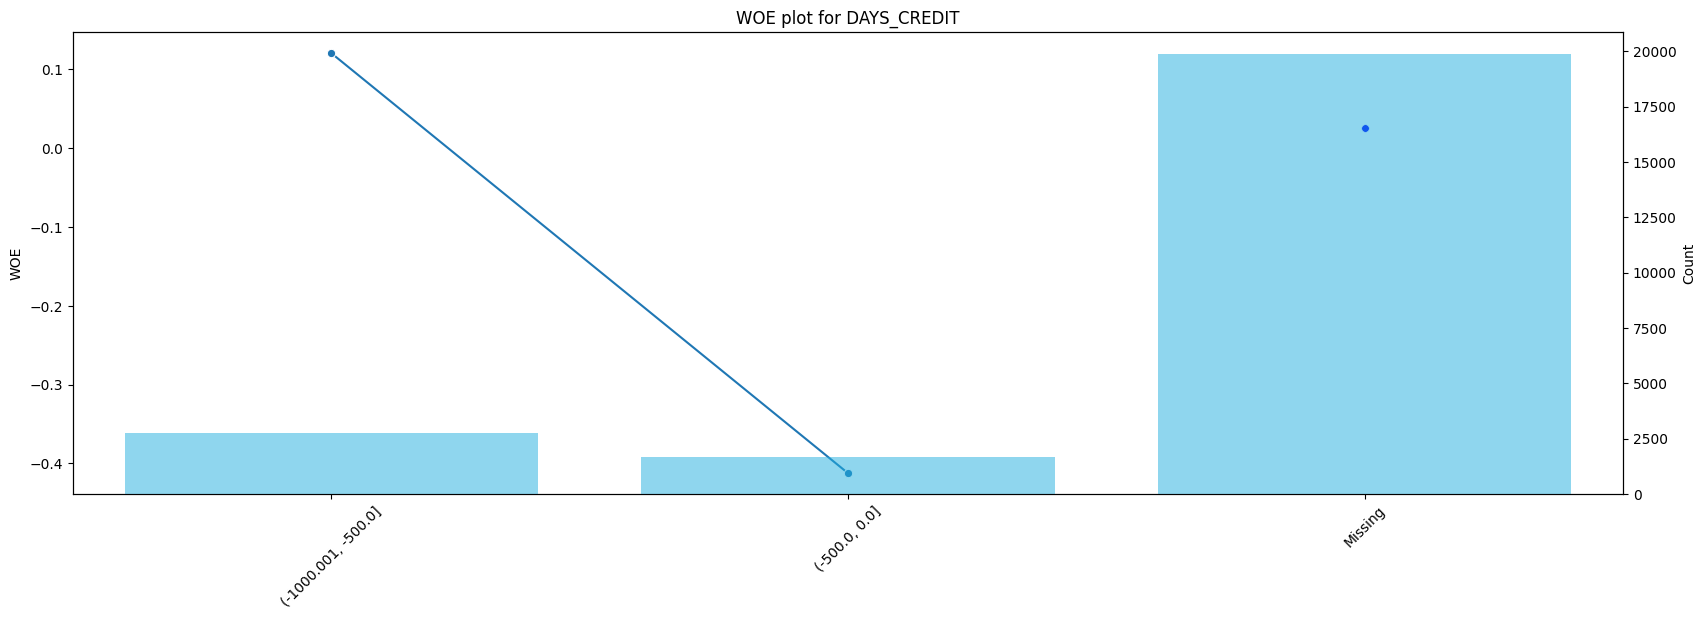

IV for DAYS_EMPLOYED with 4 bins: 0.0963
Bin (-11500.001, -5500.0]: WOE = 0.9647
Bin (-5500.0, -2500.0]: WOE = 0.4306
Bin (-2500.0, -1500.0]: WOE = 0.0934
Bin Missing: WOE = -0.2045


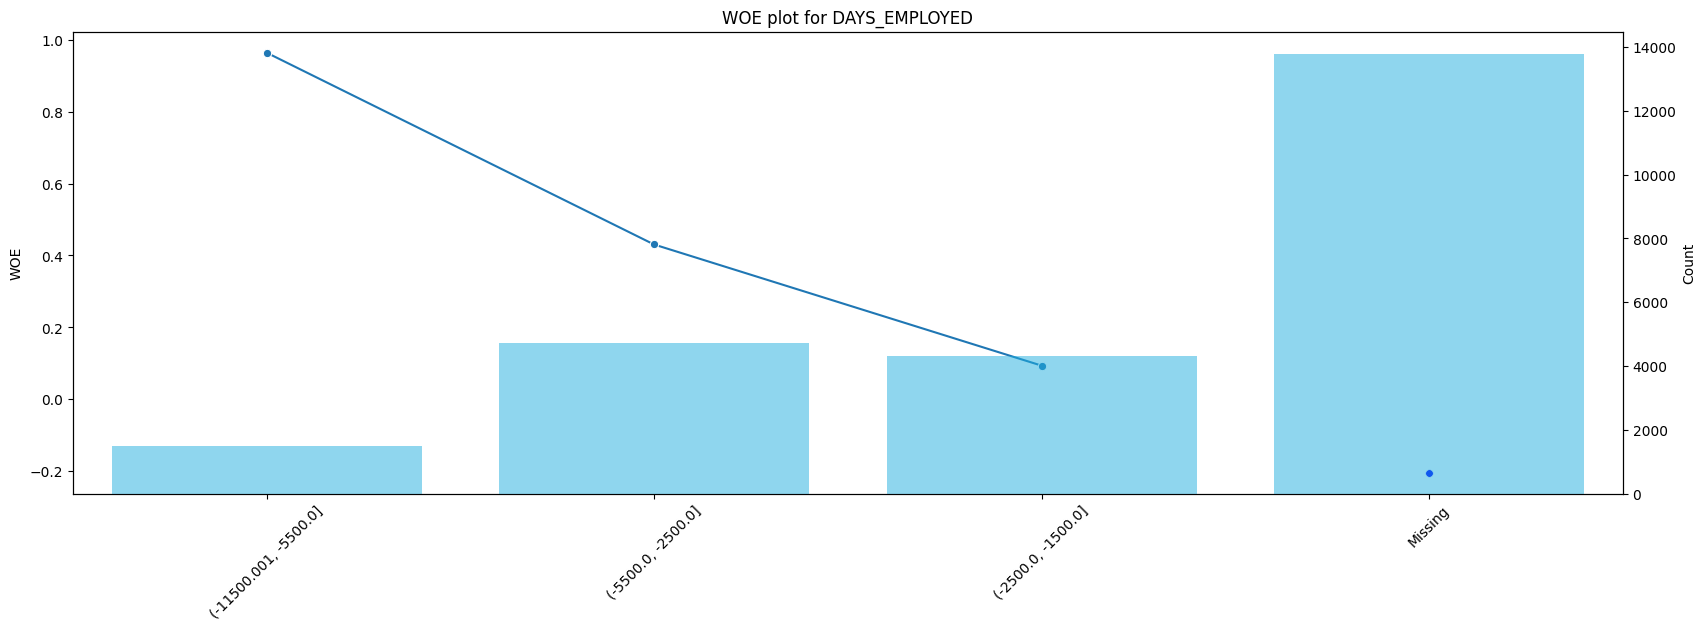

IV for AMT_CREDIT_SUM_DEBT with 4 bins: 0.0306
Bin (-0.001, 10000.0]: WOE = 0.3989
Bin (10000.0, 150000.0]: WOE = 0.0224
Bin (150000.0, 1000000.0]: WOE = -0.3076
Bin Missing: WOE = -0.0350


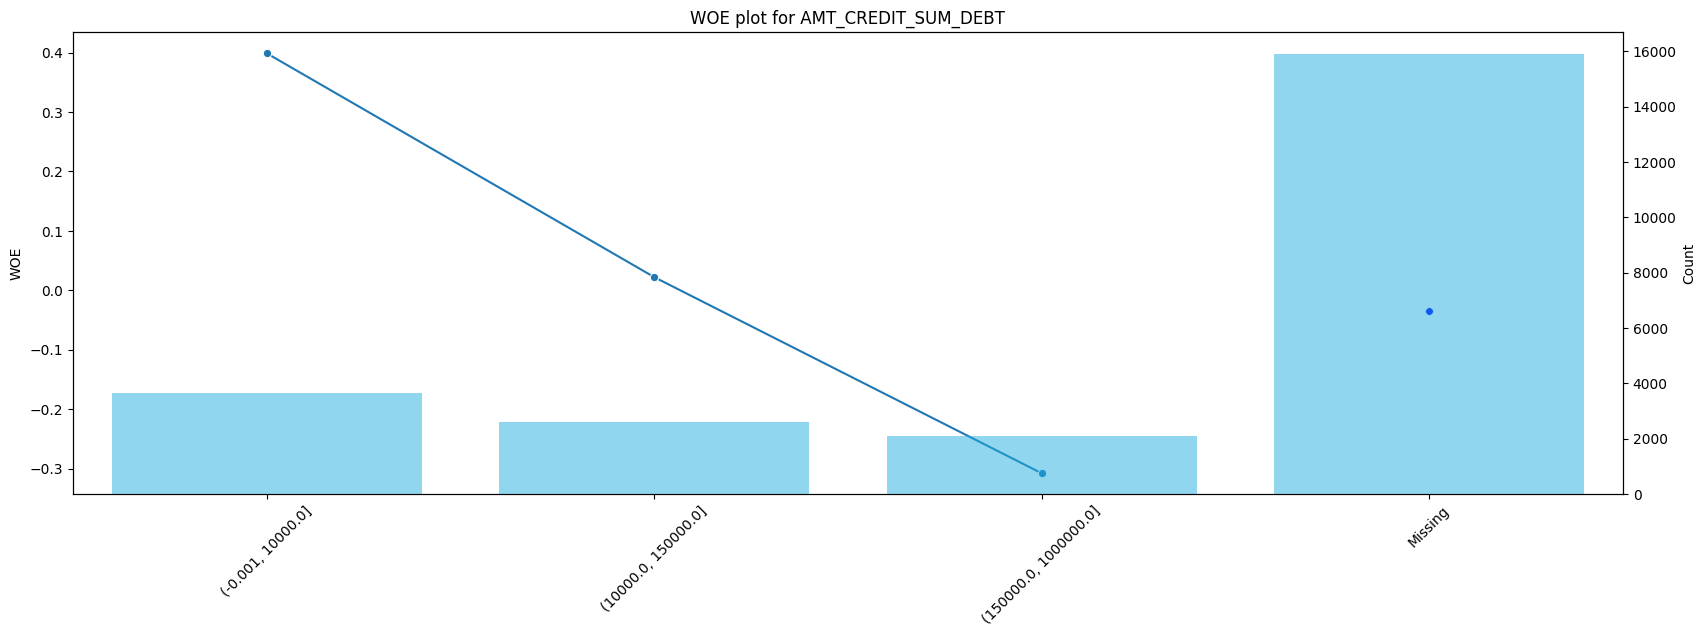

IV for AMT_CREDIT_MAX_OVERDUE with 5 bins: 0.0286
Bin (-0.001, 50.0]: WOE = 0.2802
Bin (50.0, 3000.0]: WOE = 0.1059
Bin (3000.0, 5800.0]: WOE = -0.2289
Bin (5800.0, 2400000.0]: WOE = -0.3543
Bin Missing: WOE = -0.0350


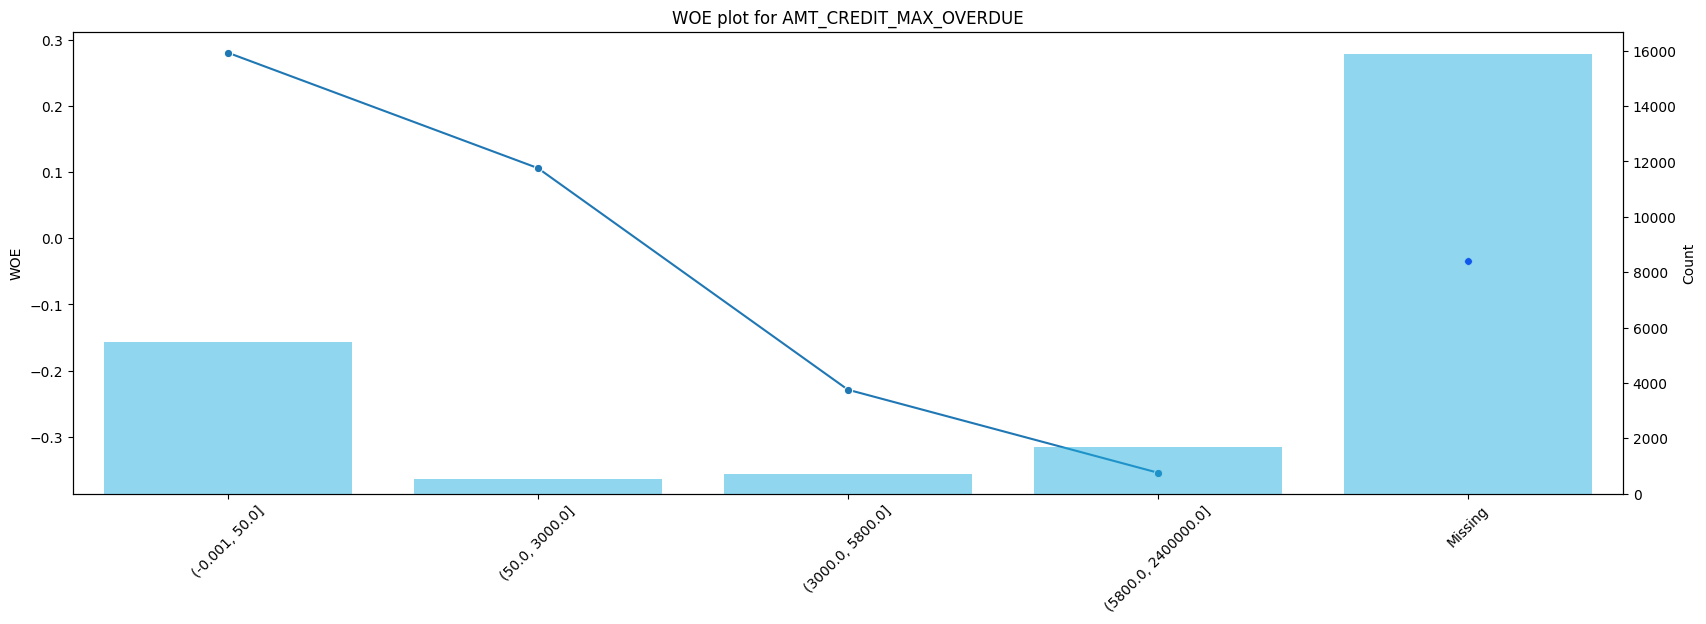

IV for DAYS_BIRTH with 5 bins: 0.0503
Bin (-30000.001, -20000.0]: WOE = 0.6758
Bin (-20000.0, -18000.0]: WOE = 0.3021
Bin (-18000.0, -13000.0]: WOE = 0.0536
Bin (-13000.0, -8000.0]: WOE = -0.1650
Bin Missing: WOE = -0.2423


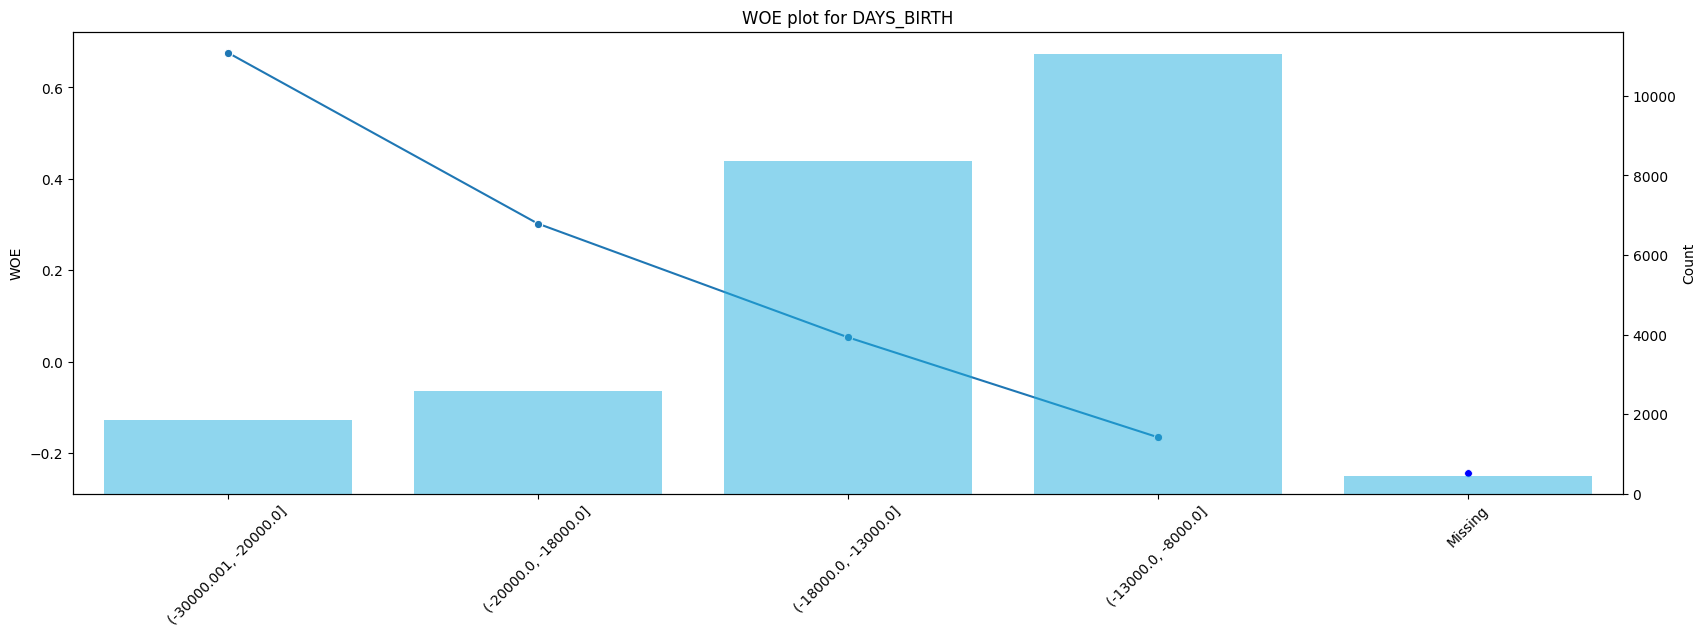

IV for DAYS_CREDIT_ENDDATE with 3 bins: 0.0213
Bin (-14300.001, -500.0]: WOE = 0.3539
Bin (-500.0, -200.0]: WOE = 0.1276
Bin Missing: WOE = -0.0667


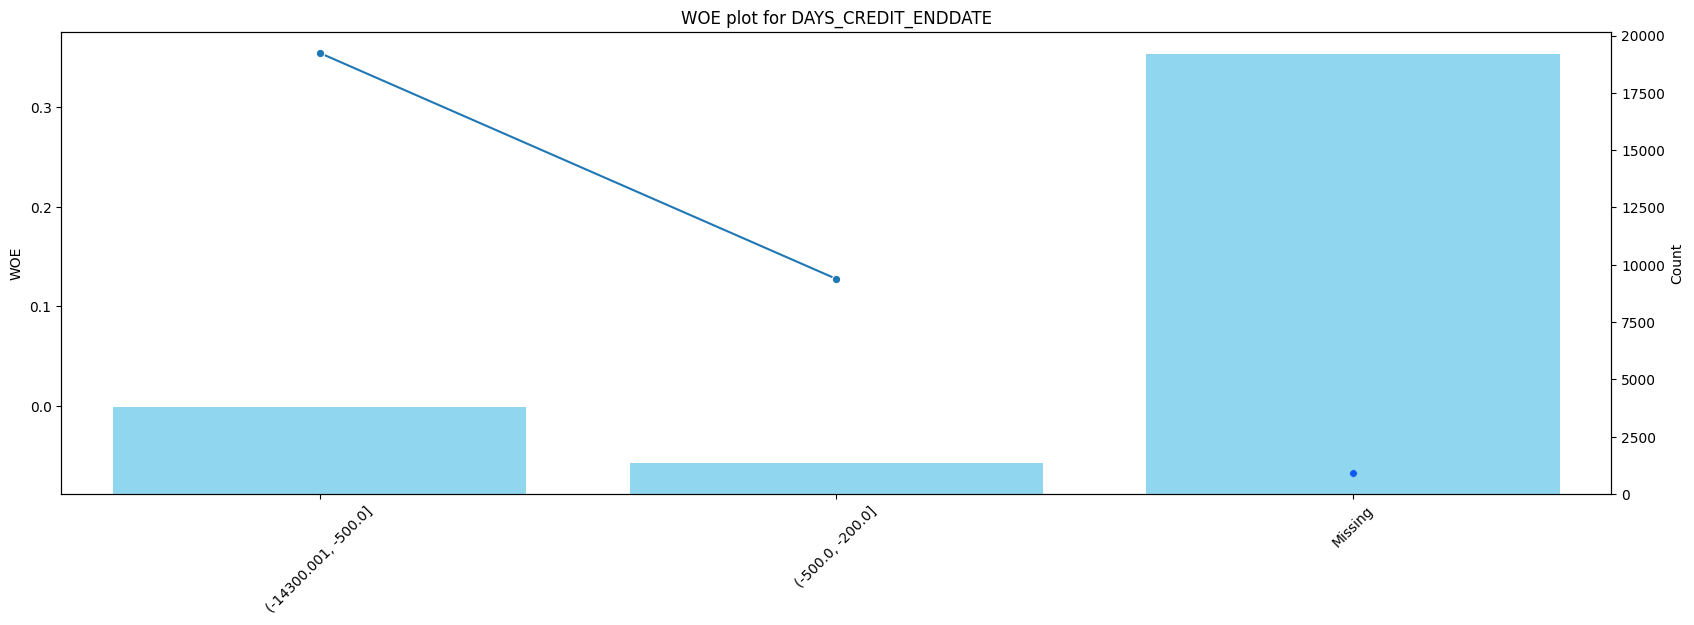

IV for FLOORSMIN_MODE with 3 bins: 0.0071
Bin (-0.001, 0.3]: WOE = 0.0884
Bin (0.3, 0.375]: WOE = 0.2503
Bin Missing: WOE = -0.0495


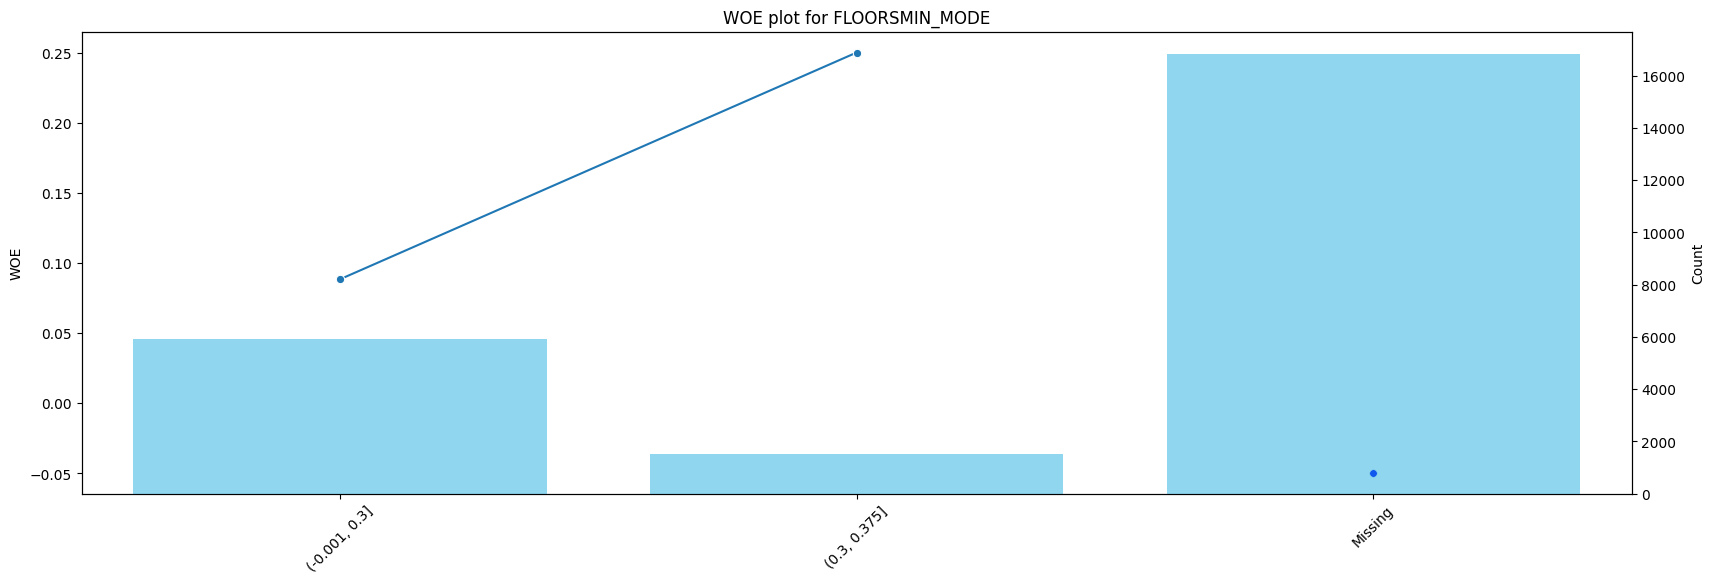

IV for DAYS_LAST_PHONE_CHANGE with 4 bins: 0.0427
Bin (-3000.001, -2000.0]: WOE = 0.4836
Bin (-2000.0, -1000.0]: WOE = 0.2231
Bin (-1000.0, -300.0]: WOE = -0.0614
Bin Missing: WOE = -0.2011


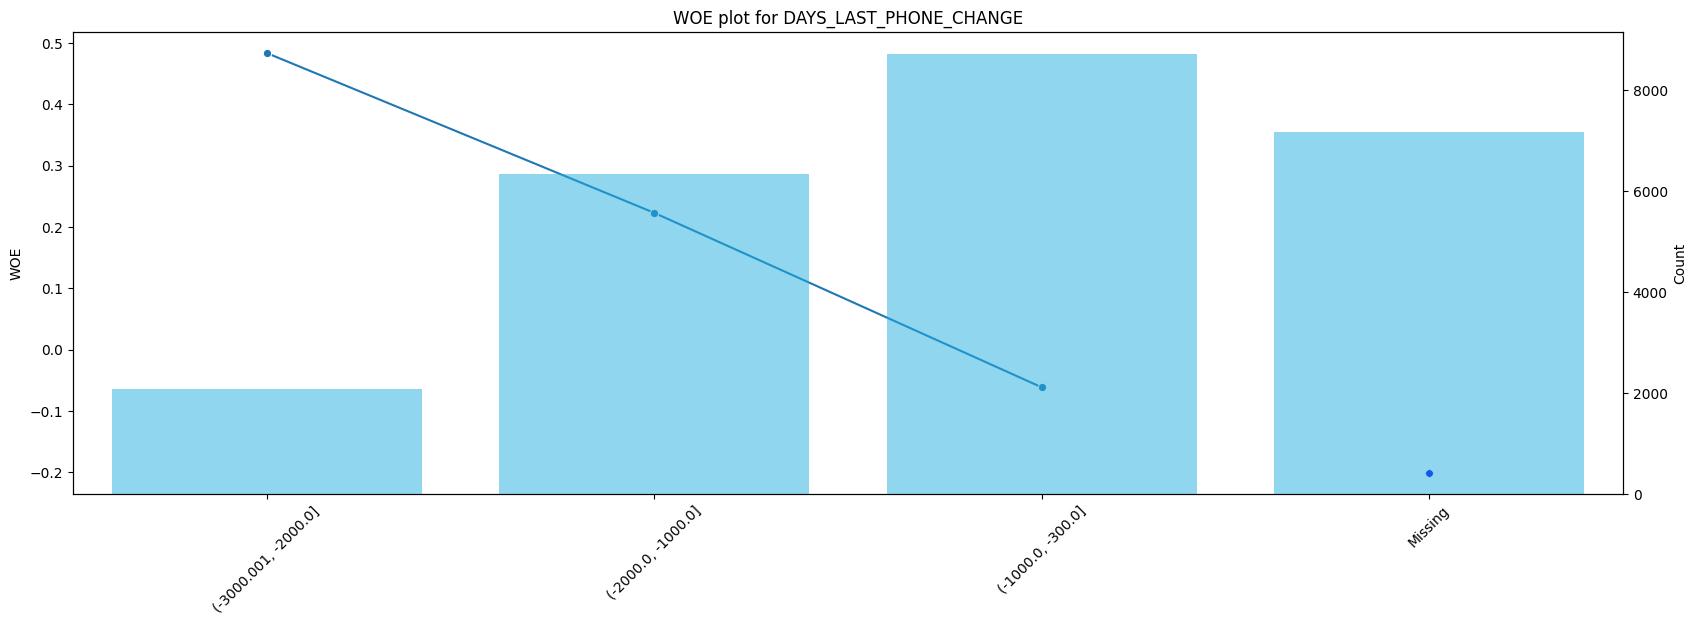

In [155]:
for item in variable_bins:
    variable = item[0]
    bin_edges = item[1]
    temp_data['Bin_Range'] = pd.cut(temp_data[variable], bins = bin_edges, include_lowest= True)
    temp_data['Bin_Range'].value_counts().sort_index()
    woe_iv_plot(temp_data, variable)

## PHASE 4: Create Scorecard

##### First attempt list

In [ ]:
# temp_cleaned = combined_data_cleaned.copy()
# top_all = ['TARGET', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'CREDIT_TYPE', 'EXT_SOURCE_1', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE','DAYS_BIRTH', 'FLOORSMIN_MODE', 'DAYS_LAST_PHONE_CHANGE']
# top_numeric = ['EXT_SOURCE_1', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE','DAYS_BIRTH', 'FLOORSMIN_MODE', 'DAYS_LAST_PHONE_CHANGE']
# top_categorical = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'CREDIT_TYPE']

# temp_cleaned = temp_cleaned[top_all]

##### Second attempt list

In [232]:
temp_cleaned = combined_data_cleaned.copy()
top_all = ['TARGET', 'DAYS_EMPLOYED', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE','DAYS_BIRTH', 'FLOORSMIN_MODE', 'DAYS_LAST_PHONE_CHANGE']
top_numeric = ['EXT_SOURCE_1', 'DAYS_EMPLOYED', 'DAYS_CREDIT', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE','DAYS_BIRTH', 'FLOORSMIN_MODE', 'DAYS_LAST_PHONE_CHANGE']
top_categorical = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE']

temp_cleaned = temp_cleaned[top_all]

In [233]:
# split data into 70% train and 30% test
train, test = sc.split_df(temp_cleaned, y = 'TARGET', ratio = .7).values()
print(train.shape)
print(test.shape)

(17009, 14)
(7290, 14)


In [234]:
# Create a dictionary from your variable_bins list for the breaks_list parameter
breaks_list = {item[0]: item[1] for item in variable_bins}

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    bins = sc.woebin(train, y='TARGET', breaks_list=breaks_list)

# Display results as before
for variable, bindetails in bins.items():
    if variable in top_all:
        print(variable, " : ")
        display(bindetails)
        print("--"*50)

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
ORGANIZATION_TYPE
>>> Continue the binning process?
1: yes 
2: no
AMT_CREDIT_MAX_OVERDUE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_MAX_OVERDUE,missing,11139,0.654889,10127,1012,0.090852,0.036340,0.000878,0.034751,missing,True
1,AMT_CREDIT_MAX_OVERDUE,"[-inf,50.0)",3847,0.226174,3593,254,0.066025,-0.309792,0.019113,0.034751,50.0,False
2,AMT_CREDIT_MAX_OVERDUE,"[50.0,3000.0)",370,0.021753,340,30,0.081081,-0.088132,0.000163,0.034751,3000.0,False
3,AMT_CREDIT_MAX_OVERDUE,"[3000.0,5800.0)",486,0.028573,434,52,0.106996,0.217816,0.001483,0.034751,5800.0,False
4,AMT_CREDIT_MAX_OVERDUE,"[5800.0,2400000.0)",1167,0.068611,1020,147,0.125964,0.402491,0.013113,0.034751,2400000.0,False


----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ORGANIZATION_TYPE,"Culture%,%Religion%,%Industry: type 12%,%Indus...",859,0.050503,827,32,0.037253,-0.912452,0.029109,0.063983,"Culture%,%Religion%,%Industry: type 12%,%Indus...",False
1,ORGANIZATION_TYPE,"Telecom%,%Transport: type 2%,%University%,%Ind...",2380,0.139926,2229,151,0.063445,-0.352412,0.015039,0.063983,"Telecom%,%Transport: type 2%,%University%,%Ind...",False
2,ORGANIZATION_TYPE,"Government%,%Advertising%,%Trade: type 1%,%Hou...",4440,0.261038,4065,375,0.084459,-0.043626,0.000488,0.063983,"Government%,%Advertising%,%Trade: type 1%,%Hou...",False
3,ORGANIZATION_TYPE,"Industry: type 11%,%Business Entity Type 2%,%B...",8248,0.484920,7450,798,0.096751,0.105756,0.005665,0.063983,"Industry: type 11%,%Business Entity Type 2%,%B...",False
4,ORGANIZATION_TYPE,"Industry: type 5%,%Security%,%Construction%,%A...",1082,0.063613,943,139,0.128466,0.425024,0.013683,0.063983,"Industry: type 5%,%Security%,%Construction%,%A...",False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Pensioner%,%State servant",1156,0.067964,1087,69,0.059689,-0.417454,0.009982,0.019416,"Pensioner%,%State servant",False
1,NAME_INCOME_TYPE,Commercial associate,4345,0.255453,4009,336,0.077330,-0.139569,0.004698,0.019416,Commercial associate,False
2,NAME_INCOME_TYPE,Working,11508,0.676583,10418,1090,0.094717,0.082259,0.004736,0.019416,Working,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT_ENDDATE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT_ENDDATE,missing,11139,0.654889,10127,1012,0.090852,0.036340,0.000878,0.019437,missing,True
1,DAYS_CREDIT_ENDDATE,"[-inf,-500.0)",2637,0.155036,2465,172,0.065226,-0.322836,0.014153,0.019437,-500.0,False
2,DAYS_CREDIT_ENDDATE,"[-500.0,-200.0)",945,0.055559,868,77,0.081481,-0.082770,0.000368,0.019437,-200.0,False
3,DAYS_CREDIT_ENDDATE,"[-200.0,inf)",2288,0.134517,2054,234,0.102273,0.167393,0.004038,0.019437,inf,False


----------------------------------------------------------------------------------------------------
FLOORSMIN_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLOORSMIN_MODE,missing,11306,0.664707,10230,1076,0.095171,0.087543,0.005281,0.025056,missing,True
1,FLOORSMIN_MODE,"[-inf,0.3)",4158,0.244459,3826,332,0.079846,-0.104824,0.002573,0.025056,0.3,False
2,FLOORSMIN_MODE,"[0.3,0.375)",14,0.000823,13,1,0.071429,-0.225333,0.000038,0.025056,0.375,False
3,FLOORSMIN_MODE,"[0.375,inf)",1531,0.090011,1445,86,0.056172,-0.481901,0.017164,0.025056,inf,False


----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_BIRTH,"[-inf,-20000.0)",1278,0.075137,1216,62,0.048513,-0.636571,0.023495,0.046318,-20000.0,False
1,DAYS_BIRTH,"[-20000.0,-18000.0)",1815,0.106708,1695,120,0.066116,-0.308330,0.008938,0.046318,-18000.0,False
2,DAYS_BIRTH,"[-18000.0,-13000.0)",5896,0.346640,5399,497,0.084294,-0.045762,0.000712,0.046318,-13000.0,False
3,DAYS_BIRTH,"[-13000.0,-8000.0)",7731,0.454524,6944,787,0.101798,0.162212,0.012786,0.046318,-8000.0,False
4,DAYS_BIRTH,"[-8000.0,inf)",289,0.016991,260,29,0.100346,0.146231,0.000386,0.046318,inf,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT,missing,11139,0.654889,10127,1012,0.090852,0.036340,0.000878,0.026723,missing,True
1,DAYS_CREDIT,"[-inf,-1000.0)",2779,0.163384,2597,182,0.065491,-0.318489,0.014542,0.026723,-1000.0,False
2,DAYS_CREDIT,"[-1000.0,-500.0)",1939,0.113998,1779,160,0.082517,-0.069016,0.000528,0.026723,-500.0,False
3,DAYS_CREDIT,"[-500.0,0.0)",1152,0.067729,1011,141,0.122396,0.369681,0.010775,0.026723,0.0,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Academic degree%,%Higher education",3933,0.231231,3708,225,0.057208,-0.462531,0.040938,0.053181,"Academic degree%,%Higher education",False
1,NAME_EDUCATION_TYPE,Incomplete higher,958,0.056323,881,77,0.080376,-0.097636,0.000516,0.053181,Incomplete higher,False
2,NAME_EDUCATION_TYPE,"Secondary / secondary special%,%Lower secondary",12118,0.712446,10925,1193,0.098449,0.125034,0.011727,0.053181,"Secondary / secondary special%,%Lower secondary",False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-11500.0)",132,0.007761,131,1,0.007576,-2.535581,0.019714,0.123891,-11500.0,False
1,DAYS_EMPLOYED,"[-11500.0,-5500.0)",1028,0.060439,994,34,0.033074,-1.035760,0.042807,0.123891,-5500.0,False
2,DAYS_EMPLOYED,"[-5500.0,-2500.0)",3309,0.194544,3112,197,0.059535,-0.420201,0.028918,0.123891,-2500.0,False
3,DAYS_EMPLOYED,"[-2500.0,-1500.0)",3063,0.180081,2819,244,0.079660,-0.107353,0.001986,0.123891,-1500.0,False
4,DAYS_EMPLOYED,"[-1500.0,inf)",9477,0.557176,8458,1019,0.107523,0.223326,0.030466,0.123891,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_1,missing,8741,0.513904,7885,856,0.097929,0.119170,0.007666,0.123009,missing,True
1,EXT_SOURCE_1,"[-inf,0.4)",4103,0.241225,3659,444,0.108214,0.230496,0.014092,0.123009,0.4,False
2,EXT_SOURCE_1,"[0.4,0.65)",2776,0.163208,2622,154,0.055476,-0.495123,0.032677,0.123009,0.65,False
3,EXT_SOURCE_1,"[0.65,1.0)",1389,0.081663,1348,41,0.029518,-1.153189,0.068574,0.123009,1.0,False


----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_LAST_PHONE_CHANGE,"[-inf,-3000.0)",161,0.009466,156,5,0.031056,-1.100801,0.007387,0.045936,-3000.0,False
1,DAYS_LAST_PHONE_CHANGE,"[-3000.0,-2000.0)",1495,0.087895,1407,88,0.058863,-0.432262,0.013759,0.045936,-2000.0,False
2,DAYS_LAST_PHONE_CHANGE,"[-2000.0,-1000.0)",4500,0.264566,4161,339,0.075333,-0.167894,0.006960,0.045936,-1000.0,False
3,DAYS_LAST_PHONE_CHANGE,"[-1000.0,-300.0)",6025,0.354224,5488,537,0.089129,0.015296,0.000083,0.045936,-300.0,False
4,DAYS_LAST_PHONE_CHANGE,"[-300.0,inf)",4828,0.283850,4302,526,0.108948,0.238083,0.017747,0.045936,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_DEBT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_DEBT,missing,11139,0.654889,10127,1012,0.090852,0.036340,0.000878,0.037225,missing,True
1,AMT_CREDIT_SUM_DEBT,"[-inf,10000.0)",2564,0.150744,2414,150,0.058502,-0.438788,0.024250,0.037225,10000.0,False
2,AMT_CREDIT_SUM_DEBT,"[10000.0,150000.0)",1859,0.109295,1700,159,0.085530,-0.029863,0.000096,0.037225,150000.0,False
3,AMT_CREDIT_SUM_DEBT,"[150000.0,1000000.0)",1447,0.085073,1273,174,0.120249,0.349540,0.012001,0.037225,1000000.0,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,missing,2868,0.168617,2615,253,0.088215,0.003987,0.000003,0.069411,missing,True
1,OCCUPATION_TYPE,"Secretaries%,%Accountants%,%IT staff%,%HR staf...",2546,0.149685,2414,132,0.051846,-0.566622,0.038138,0.069411,"Secretaries%,%Accountants%,%IT staff%,%HR staf...",False
2,OCCUPATION_TYPE,"Waiters/barmen staff%,%High skill tech staff%,...",5208,0.306191,4787,421,0.080837,-0.091410,0.002464,0.069411,"Waiters/barmen staff%,%High skill tech staff%,...",False
3,OCCUPATION_TYPE,"Cleaning staff%,%Laborers",4271,0.251102,3845,426,0.099742,0.139527,0.005178,0.069411,"Cleaning staff%,%Laborers",False
4,OCCUPATION_TYPE,"Security staff%,%Cooking staff",1018,0.059851,904,114,0.111984,0.268986,0.004838,0.069411,"Security staff%,%Cooking staff",False
5,OCCUPATION_TYPE,"Drivers%,%Low-skill Laborers",1098,0.064554,949,149,0.135701,0.488154,0.018791,0.069411,"Drivers%,%Low-skill Laborers",False


----------------------------------------------------------------------------------------------------


##### WOE Encoding

In [235]:
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    train_woe = sc.woebin_ply(train, bins)
    test_woe = sc.woebin_ply(test, bins)

# Fill all NaN with 0 
train_woe = train_woe.fillna(0)

train_woe


[INFO] converting into woe values ...
[INFO] converting into woe values ...


,TARGET,AMT_CREDIT_MAX_OVERDUE_woe,ORGANIZATION_TYPE_woe,NAME_INCOME_TYPE_woe,DAYS_CREDIT_ENDDATE_woe,FLOORSMIN_MODE_woe,DAYS_BIRTH_woe,DAYS_CREDIT_woe,NAME_EDUCATION_TYPE_woe,DAYS_EMPLOYED_woe,EXT_SOURCE_1_woe,DAYS_LAST_PHONE_CHANGE_woe,AMT_CREDIT_SUM_DEBT_woe,OCCUPATION_TYPE_woe
0,0,-0.309792,-0.043626,0.082259,-0.082770,0.087543,-0.308330,-0.069016,0.125034,0.223326,0.119170,0.015296,-0.438788,0.139527
4,1,-0.309792,0.105756,0.082259,0.167393,0.087543,-0.045762,-0.069016,0.125034,-0.420201,-0.495123,-0.167894,0.000000,-0.091410
5,0,0.036340,-0.352412,0.082259,0.036340,0.087543,0.162212,0.036340,-0.462531,-0.420201,0.230496,0.238083,0.036340,0.003987
7,0,0.036340,0.425024,0.082259,0.036340,0.087543,-0.045762,0.036340,0.125034,-1.035760,-0.495123,-0.167894,0.036340,0.488154
8,0,0.217816,-0.352412,-0.139569,-0.322836,0.087543,0.162212,-0.069016,-0.462531,0.223326,0.230496,0.238083,-0.029863,0.139527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24293,0,-0.309792,0.105756,-0.139569,-0.082770,-0.104824,-0.045762,-0.069016,0.125034,0.223326,0.000000,-0.167894,-0.029863,0.003987
24295,0,0.036340,-0.043626,0.082259,0.036340,-0.104824,-0.636571,0.036340,0.125034,-0.420201,0.119170,0.238083,0.036340,0.139527
24296,0,0.036340,0.105756,0.082259,0.036340,0.087543,0.162212,0.036340,0.125034,0.223326,-0.495123,0.015296,0.036340,-0.091410
24297,0,0.036340,-0.043626,-0.417454,0.036340,0.087543,0.162212,0.036340,-0.462531,0.223326,-0.495123,0.015296,0.036340,-0.566622


##### Get intercept and coefficient

In [236]:
# create the X, y parts of data for train and test
y_train = train_woe.loc[:, 'TARGET']
X_train = train_woe.loc[:, train_woe.columns != 'TARGET']
y_test = test_woe.loc[:, 'TARGET']
X_test = test_woe.loc[:, train_woe.columns != 'TARGET']

# create a logistic regression model object
lr = linear_model.LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
          index = np.concatenate([['intercept'], lr.feature_names_in_]) )

intercept                    -0.001981
AMT_CREDIT_MAX_OVERDUE_woe    0.989141
ORGANIZATION_TYPE_woe         0.737446
NAME_INCOME_TYPE_woe          0.345310
DAYS_CREDIT_ENDDATE_woe       0.612120
FLOORSMIN_MODE_woe            0.757631
DAYS_BIRTH_woe                0.677853
DAYS_CREDIT_woe              -0.698238
NAME_EDUCATION_TYPE_woe       0.774508
DAYS_EMPLOYED_woe             0.759022
EXT_SOURCE_1_woe              0.740057
DAYS_LAST_PHONE_CHANGE_woe    0.655606
AMT_CREDIT_SUM_DEBT_woe       0.930036
OCCUPATION_TYPE_woe           0.630474
dtype: float64

##### Generate scorecard

In [237]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # Attempt 1:
    # card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20, basepoints_eq0 = True)

    # Attempt 2:
    # card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 50, basepoints_eq0 = True)

    # Attempt 3:
    card = sc.scorecard(bins, lr, X_train.columns, points0 = 500, odds0 = 1/50, pdo = 20, basepoints_eq0 = True)

pprint.pprint(card)


{'AMT_CREDIT_MAX_OVERDUE':                  variable                 bin  points
0  AMT_CREDIT_MAX_OVERDUE             missing    29.0
1  AMT_CREDIT_MAX_OVERDUE         [-inf,50.0)    39.0
2  AMT_CREDIT_MAX_OVERDUE       [50.0,3000.0)    32.0
3  AMT_CREDIT_MAX_OVERDUE     [3000.0,5800.0)    24.0
4  AMT_CREDIT_MAX_OVERDUE  [5800.0,2400000.0)    18.0,
 'AMT_CREDIT_SUM_DEBT':                variable                   bin  points
47  AMT_CREDIT_SUM_DEBT               missing    29.0
48  AMT_CREDIT_SUM_DEBT        [-inf,10000.0)    42.0
49  AMT_CREDIT_SUM_DEBT    [10000.0,150000.0)    31.0
50  AMT_CREDIT_SUM_DEBT  [150000.0,1000000.0)    20.0,
 'DAYS_BIRTH':       variable                  bin  points
21  DAYS_BIRTH      [-inf,-20000.0)    42.0
22  DAYS_BIRTH  [-20000.0,-18000.0)    36.0
23  DAYS_BIRTH  [-18000.0,-13000.0)    31.0
24  DAYS_BIRTH   [-13000.0,-8000.0)    27.0
25  DAYS_BIRTH        [-8000.0,inf)    27.0,
 'DAYS_CREDIT':        variable               bin  points
26  DAYS_CREDIT

##### Logistic regression model

In [238]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    train_score = sc.scorecard_ply(train, card)
    test_score = sc.scorecard_ply(test, card)

# First attempt
# cutoff = 350

# Second and third attempt
cutoff = 400

approval_count = test_score[test_score["score"]>cutoff].count()['score']
approval_rate = approval_count/test_score.shape[0]
print(f'Cutoff score of {cutoff:.0f}: {approval_count:,.0f} applications approved ({approval_rate:.1%})')

odds_at_cutoff = 1.5625
default_prob = 1/(1+odds_at_cutoff)
defaults = default_prob*approval_count
print(f'Cutoff score of {cutoff:.0f}: {defaults:.0f} defaults expected')

# create sets of predicted bad to compare with actual bad
predicted_bad_train = (train_score < cutoff)
predicted_bad_train_list = predicted_bad_train.astype(int).values.flatten().tolist()
predicted_bad_test = (test_score < cutoff)
predicted_bad_test_list = predicted_bad_test.astype(int).values.flatten().tolist()

print('*** Training Data Performance ***')
print('Confusion matrix:')
print(metrics.confusion_matrix(y_train, predicted_bad_train_list))
print('PCC measures:')
print(metrics.classification_report(y_train, predicted_bad_train_list))

print('*** Test Data Performance ***')
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, predicted_bad_test_list))
print('PCC measures:')
print(metrics.classification_report(y_test, predicted_bad_test_list))

Cutoff score of 400: 1,726 applications approved (23.7%)
Cutoff score of 400: 674 defaults expected
*** Training Data Performance ***
Confusion matrix:
[[ 4128 11386]
 [  131  1364]]
PCC measures:
              precision    recall  f1-score   support

           0       0.97      0.27      0.42     15514
           1       0.11      0.91      0.19      1495

    accuracy                           0.32     17009
   macro avg       0.54      0.59      0.30     17009
weighted avg       0.89      0.32      0.40     17009

*** Test Data Performance ***
Confusion matrix:
[[1743 4906]
 [  70  571]]
PCC measures:
              precision    recall  f1-score   support

           0       0.96      0.26      0.41      6649
           1       0.10      0.89      0.19       641

    accuracy                           0.32      7290
   macro avg       0.53      0.58      0.30      7290
weighted avg       0.89      0.32      0.39      7290



## PHASE 5: Analysis and Tuning

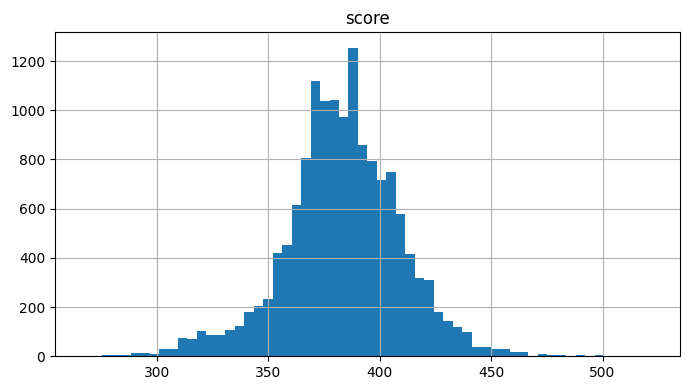

In [242]:
# combine scores for train and test data to assess distribution for entire population
combined_score = pd.concat([test_score, test_score], ignore_index=True)

# plot distribution of scores on copmbined data
combined_score.hist(figsize = (7, 4), bins = 60)
plt.tight_layout()

In [241]:
approval_count = test_score[test_score["score"]>cutoff].count()['score']
approval_rate = approval_count/test_score.shape[0]
print(f'Cutoff score of {cutoff:.0f}: {approval_count:,.0f} applications approved ({approval_rate:.1%})')

Cutoff score of 400: 1,726 applications approved (23.7%)


##### Profit maximisation

In [240]:
def calculate_earnings(default_rate, loan_amount, total_loans, interest_rate=0.08, recovery_rate=0.5, loan_duration_years=5):
    # Non-defaulted loans 3-8% 1-7year
    non_defaulted_loans = total_loans * (1 - default_rate)
    interest_income = non_defaulted_loans * loan_amount * interest_rate * loan_duration_years

    # Defaulted loans 50% recovery
    defaulted_loans = total_loans * default_rate
    default_loss = defaulted_loans * loan_amount * (1 - recovery_rate)

    # Total earnings 
    total_earnings = interest_income - default_loss
    percent= (total_earnings / (total_loans * loan_amount)) * 100
    # Print results
    print(f"Interest from Non-Defaulters: ${interest_income:,.2f}")
    print(f"Loss from Defaulters: ${default_loss:,.2f}")
    print(f"Total Earnings: ${total_earnings:,.2f}")
    print(f"Percentage of Total Earnings: {percent:.2f}%")

    return total_earnings


loan_amount = 40000  

#400
default_rate = 674/1726  
total_loans = 1726

earnings = calculate_earnings(default_rate, loan_amount, total_loans)

Interest from Non-Defaulters: $16,832,000.00
Loss from Defaulters: $13,480,000.00
Total Earnings: $3,352,000.00
Percentage of Total Earnings: 4.86%
